**IDEA PER I DATI SBILANCIATI**:fare più modelli con i dati bilanciati e poi fare majority voting o media dei risultati

Posiamo provare ad implementare come architettura LSTM.

## **1. DATA EXTRACTION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### RETRIVE ID AND NUMBER OF PATIENTS

In [ ]:
pip install scipy

In [ ]:
import scipy.io
import numpy as np

In [ ]:
import os
def process_files_in_folder(folder_path):
  # Get the list of files and directories in the given folder
  elements = os.listdir(folder_path)
  # Filter out only files
  files = [f for f in elements if os.path.isfile(os.path.join(folder_path, f))]
  # Process each file
  print('number of files',len(files))
  patients = []
  for file in files:
    patients.append(file[:8])

  return patients


In [ ]:
a = process_files_in_folder('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/train')
print(len(a))

number of files 315
315


In [ ]:
ID_patients = sorted(list(set(a)))
ID_patients

['S001_128',
 'S002_128',
 'S003_128',
 'S004_128',
 'S005_128',
 'S006_128',
 'S007_128',
 'S008_128',
 'S009_128',
 'S010_128',
 'S011_128',
 'S012_128',
 'S013_128',
 'S014_128',
 'S015_128',
 'S016_128',
 'S017_128',
 'S018_128',
 'S019_128',
 'S020_128',
 'S021_128',
 'S022_128',
 'S023_128',
 'S024_128',
 'S025_128',
 'S026_128',
 'S027_128',
 'S028_128',
 'S029_128',
 'S030_128',
 'S031_128',
 'S032_128',
 'S033_128',
 'S034_128',
 'S035_128',
 'S036_128',
 'S037_128',
 'S038_128',
 'S039_128',
 'S040_128',
 'S041_128',
 'S042_128',
 'S043_128',
 'S044_128',
 'S045_128',
 'S046_128',
 'S047_128',
 'S048_128',
 'S049_128',
 'S050_128',
 'S051_128',
 'S052_128',
 'S053_128',
 'S054_128',
 'S055_128',
 'S056_128',
 'S057_128',
 'S058_128',
 'S059_128',
 'S060_128',
 'S061_128',
 'S062_128',
 'S079_250',
 'S080_250',
 'S081_250',
 'S082_250',
 'S083_250',
 'S084_250',
 'S085_250',
 'S086_250',
 'S087_250',
 'S088_250',
 'S089_250',
 'S090_250',
 'S091_250',
 'S092_250',
 'S093_250',

In [ ]:
sample_freq = [0]*len(ID_patients)
for i in range(len(ID_patients)):
  sample_freq[i] = int(ID_patients[i][5:])

In [ ]:
print(sample_freq)

[128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]


In [ ]:
np.save('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/sample_freq.npy',sample_freq)

### EXTRACT VARIABLES

In [ ]:
import scipy.io

def extract_var(mat_file_path, variable_name):
    mat_data = scipy.io.loadmat(mat_file_path)
    variable_value = mat_data[variable_name]
    return variable_value


In [ ]:
#a = extract_var('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/train/S001_128_ann.mat','labels')

In [ ]:
# # now can extract the different information and store them into different variables
# PATH = '/content/drive/MyDrive/APPLED_AI_ASSIGMENT/train/'
# num_patient = len(ID_patients)
# targets = [0]*num_patient
# signal = [0]*num_patient
# peaks = [0]*num_patient

# for i in range (0,num_patient):
#   targets[i] = extract_var(PATH + ID_patients[i] + '_' + 'ann.mat','labels')

#   signal[i] = np.concatenate(extract_var(PATH + ID_patients[i] + '.mat','ppg')) #concatenate perchè altrimenti ogni singolo valore era salvato all'interno di un array di dimensione 1
#   peaks[i] = np.concatenate(extract_var(PATH + ID_patients[i] + '_' + 'spk.mat','speaks'))
# np.save('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/targets.npy',targets)
# np.save('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/signal.npy',signal)
# np.save('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/peaks.npy',peaks)

### LOAD DATA

In [ ]:
targets = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/targets.npy',allow_pickle=True)
signal = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/signal.npy',allow_pickle=True)
peaks = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/peaks.npy',allow_pickle=True)
sample_freq = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/sample_freq.npy',allow_pickle=True)

In [ ]:
len(signal[100])

450000

In [ ]:
print(targets.shape, signal.shape, peaks.shape, sample_freq.shape)

(105,) (105,) (105,) (105,)


In [ ]:
signal[0]

array([-2.38138363, -2.38135063, -2.38131159, ..., -3.93333424,
       -4.06168546, -4.2308891 ])

## **2. PRE-PROCESSING AND PLOTTING**

### RESAMPLNG

In [ ]:
from scipy.signal import resample
resampling_factor = 128/250 #since our target sampling frequency is 128 Hz
resampled_signal = [0]*signal.shape[0]
# Calculate the new length of the resampled signal
for i in range(signal.shape[0]):
  if sample_freq[i] == 250:
    #print('in')
    new_length = int(len(signal[i]) * resampling_factor)
    #resample the signal
    resampled_signal[i]= resample(signal[i], new_length)
    #print(signal[i].shape)
    #print(resampled_signal[i].shape)
  else:
    resampled_signal[i] = signal[i]

In [ ]:
resampled_signal = np.array(resampled_signal)

<ipython-input-19-035838932c88>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  resampled_signal = np.array(resampled_signal)


In [ ]:
resampled_signal.shape

(105,)

In [ ]:
resampled_signal[100].shape

(230400,)

In [ ]:
signal[100].shape

(450000,)

In [ ]:
duration = []
for i in range(signal.shape[0]):
  if sample_freq[i] == 128:
    duration.append(len(signal[i]))

Text(0.5, 1.0, 'Histogram of Occurrences')

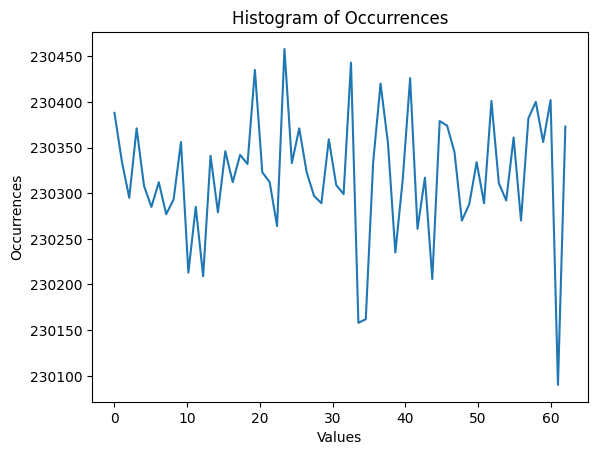

In [ ]:
# Extract values and occurrences
values = np.linspace(0,62,62)
counts = duration

# Plotting the histogram
plt.plot(values, counts)

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.title('Histogram of Occurrences')

#### PEAK POSITION ADJUSTMENT

In [ ]:
def translate_position(old_position, old_sampling_frequency, new_sampling_frequency):
    return np.round((old_position / old_sampling_frequency) * new_sampling_frequency).astype(int)

In [ ]:
new_peaks = [0]*signal.shape[0]
for i in range(signal.shape[0]):
  if sample_freq[i] == 250:
    new_peaks[i] = translate_position(peaks[i],250,128)
  else:
    new_peaks[i] = peaks[i]

### TARGETS DISTRIBUTION

In [ ]:
classes = set(targets[0])
classes

{'N', 'S', 'V'}

In [ ]:
occurances = [0]*targets.shape[0] #creiamo una lista della stessa dimensione del numero di pazienti
for i in range(targets.shape[0]):
  count = {}
  for ii in targets[i]:
    if ii in count:
      count[ii] += 1
    else:
      count[ii] = 1
  occurances[i] = count # list of dictionary . Length equal to the number of patients since we want to analyse each signal
                        # each element is a dictonary where we have count the occurances of the targets

  for iii in ['N','S','V']: # per avere la stessa struttura per tutti i segnali anche se alcuni non presentano nessuna occorrenza di S e V
    if iii not in occurances[i].keys():
      occurances[i][iii] = 0

In [ ]:
occurances[0]

{'N': 2119, 'S': 277, 'V': 207}

In [ ]:
N_tot = 0
S_tot = 0
V_tot = 0
for i in range(targets.shape[0]):
  N_tot += occurances[i]['N']
  S_tot += occurances[i]['S']
  V_tot += occurances[i]['V']

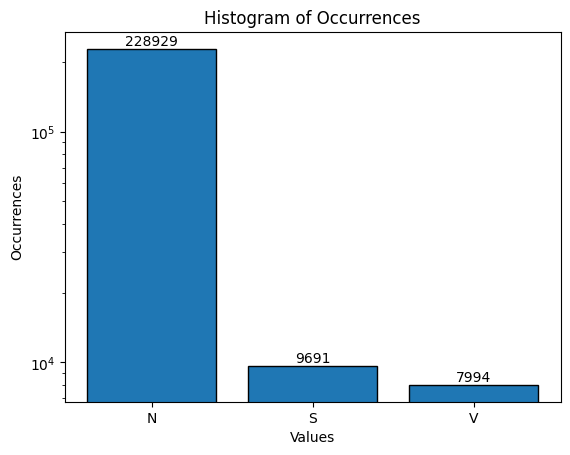

In [ ]:
import matplotlib.pyplot as plt
# Extract values and occurrences
values =['N','S','V']
counts = [N_tot,S_tot,V_tot]

# Plotting the histogram
plt.bar(values, counts, edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.title('Histogram of Occurrences')
plt.yscale('log')

for value, count in zip(values, counts):
    plt.text(value, count + 0.1, str(count), ha='center', va='bottom')
# Display the plot
plt.show()

### PLOT

In [ ]:
def plot(signal,sample_freq,peaks):
  t = [0]*signal.shape[0]
  peaks_value = [0]*signal.shape[0]
  peaks_time = [0]*signal.shape[0]
  for i in range(signal.shape[0]):
    sign_len = len(signal[i])/int(sample_freq[i])
    t[i] = np.arange(0,sign_len, 1/sample_freq[i])
    peaks_value[i] = signal[i][peaks[i]]
    peaks_time[i] = t[i][peaks[i]]
  return t, np.array(peaks_time), np.array(peaks_value)

In [ ]:
new_sample_freq = [128]*signal.shape[0]

In [ ]:
new_peaks[100][100]

12591

In [ ]:
peaks[100]

array([   247,    497,    746, ..., 449531, 449736, 449935], dtype=int32)

In [ ]:
[t,a,b] = plot(resampled_signal,new_sample_freq, new_peaks)

<ipython-input-32-4c82d8859008>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t, np.array(peaks_time), np.array(peaks_value)


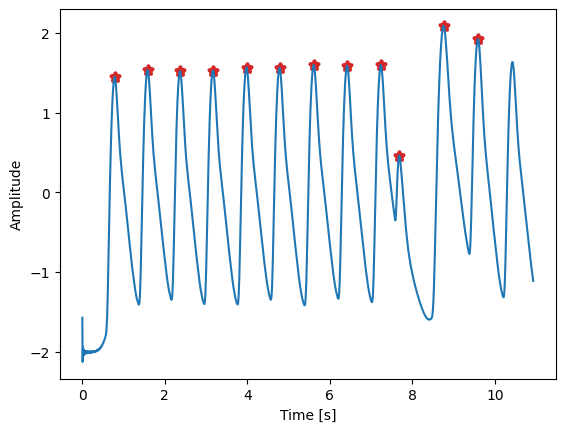

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#axs.set_title("Patient:" + str(patient) + " - Label:" + labels_adapt[patient])
plt.plot(t[70][:1400], resampled_signal[70][:1400], color='C0')
plt.scatter(a[70][:12], b[70][:12], marker = '*', color='C3',linewidths=3)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
print(t[70].shape, resampled_signal[70].shape)

(230400,) (230400,)


In [ ]:
targets[70][:10]

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'S'], dtype='<U1')

##Extract single peaks

In [ ]:
# per poter andare ad estrarre i diversi segnali, avevevo pensato utilizzare un intervallo di 0.5sec centrato nei peaks
# per cercare di perdere il meno possibile

# NB. nell'ultima parte del segnale non ci sono targets ma per noi non è un problema dato che i nostri intervalli saranno centrati solo nella posizione dei picchi

In [ ]:
targets_freq = [0]*resampled_signal.shape[0]
count_final = {'N':0,'S':0, 'V':0}
for i in range(resampled_signal.shape[0]):
  count_final[targets[i][0]] += 1
  count_final[targets[i][-1]] += 1

In [ ]:
count_final

{'N': 196, 'S': 6, 'V': 8}

In [ ]:
196/(196+6+8)


0.9333333333333333

In [ ]:
def extract_peaks(signal, peaks, target, number_RR=1):
  output_signal = [0]*(peaks.shape[0]-2*number_RR)
  output_target = [0]*(peaks.shape[0]-2*number_RR)
  output_peaks = [0]*(peaks.shape[0]-2*number_RR)
  #count = 0
  for i in range(number_RR,peaks.shape[0]-number_RR):
    output_signal[i-number_RR] = signal[peaks[i-number_RR]:peaks[i+number_RR]]
    output_target[i-number_RR] = target[i]
    output_peaks[i-number_RR] = peaks[i]-peaks[i-number_RR]

  return np.array(output_signal), np.array(output_target), np.array(output_peaks)

In [ ]:
number_RR = 1

single_peaks = [0]*signal.shape[0] #segnale
single_labels = [0]*signal.shape[0] #label
central_peak = [0]*signal.shape[0] #indice del picco centrale
for i in range(signal.shape[0]):
  [single_peaks[i], single_labels[i], central_peak[i]] = extract_peaks(resampled_signal[i],new_peaks[i], targets[i], number_RR=number_RR)
single_peaks = np.array(single_peaks)
single_labels = np.array(single_labels)
central_peak = np.array(central_peak)

<ipython-input-43-99f9955d2a41>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(output_signal), np.array(output_target), np.array(output_peaks)
<ipython-input-44-54f306680da5>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  single_peaks = np.array(single_peaks)
<ipython-input-44-54f306680da5>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' w

# DATA SPLITTING

In [ ]:
def extract(num):
  while True:
    import random
    n = list(range(0,105))
    tr = random.sample(n,60)
    val = random.sample(list(set(n)-set(tr)),30)
    te = random.sample(list(set(n)-set(tr)-set(val)),15)

    single_peaks_training = single_peaks[tr]
    single_labels_training = single_labels[tr]
    central_peak_training = central_peak[tr]

    single_peaks_validation = single_peaks[val]
    single_labels_validation = single_labels[val]
    central_peak_validation = central_peak[val]

    single_peaks_test = single_peaks[te]
    single_labels_test = single_labels[te]
    central_peak_test = central_peak[te]

    count_tr = {'N':0,'S':0, 'V':0}
    count_val = {'N':0,'S':0, 'V':0}
    count_te = {'N':0,'S':0, 'V':0}
    count = [count_tr, count_val, count_te]
    dataset = [single_labels_training, single_labels_validation, single_labels_test]
    for ii in range(3):
      #print(ii)
      for i in range(dataset[ii].shape[0]):
        for j in range(dataset[ii][i].shape[0]):
          #print(dataset[ii][i][j])
          count[ii][dataset[ii][i][j]] += 1




    if np.abs(count[1]['S']-count[1]['V']) < num and np.abs(count[2]['S']-count[2]['V']) < num and np.abs(count[0]['S']-count[0]['V']< num):
      np.save('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/tr7_2.npy',tr)
      np.save('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/val7_2.npy',val)
      np.save('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/te7_2.npy',te)

      print('tr-S-' + str(count[0]['S']))
      print('tr-V-' + str(count[0]['V']))
      print('val-S-' + str(count[1]['S']))
      print('val-V-' + str(count[1]['V']))
      print('te-S-' + str(count[2]['S']))
      print('te-V' + str(count[2]['V']))
      return 'ok'



In [ ]:
extract(700)

tr-S-5621
tr-V-5225
val-S-2495
val-V-1823
te-S-1569
te-V938


'ok'

In [ ]:
tr = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/index_patient_splitting/tr7_1.npy')
val = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/index_patient_splitting/val7_1.npy')
te = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/index_patient_splitting/te7_1.npy')

In [ ]:
single_peaks_training = single_peaks[tr]
single_labels_training = single_labels[tr]
central_peak_training = central_peak[tr]

single_peaks_validation = single_peaks[val]
single_labels_validation = single_labels[val]
central_peak_validation = central_peak[val]

single_peaks_test = single_peaks[te]
single_labels_test = single_labels[te]
central_peak_test = central_peak[te]

# ragionamento per scegliere range amplitude

In [ ]:
##### split single peaks based on the different classes #####
def classes(single_peaks,single_labels):
  single_peaks_N=[]
  single_peaks_S=[]
  single_peaks_V=[]

  for i in range(single_peaks.shape[0]): # for the different patients
    for j in range(single_peaks[i].shape[0]): # for the different single peak
      if single_labels[i][j]=='N':
        single_peaks_N.append(single_peaks[i][j])
      elif single_labels[i][j]=='S':
        single_peaks_S.append(single_peaks[i][j])
      else:
        single_peaks_V.append(single_peaks[i][j])

  return np.array(single_peaks_N), np.array(single_peaks_S), np.array(single_peaks_V)

In [ ]:
N,S,V = classes(single_peaks,single_labels)

<ipython-input-49-f6f6a4609586>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(single_peaks_N), np.array(single_peaks_S), np.array(single_peaks_V)


In [ ]:
N.shape #N

(228733,)

In [ ]:
S.shape #S

(9685,)

In [ ]:
V.shape #V

(7986,)

In [ ]:
size_iniziale=N.shape[0]+S.shape[0]+V.shape[0]

In [ ]:
size_eliminati=0
size_filtrati=0

In [ ]:
def remove_over_amplitude(single_peaks_S,massimo=2.5,minimo=-2.5):
  single_peaks_new=[]
  eliminati=[]
  for i in range(single_peaks_S.shape[0]):
    finestra_singola=single_peaks_S[i]
    if minimo<np.min(finestra_singola) and np.max(finestra_singola)<massimo:
      single_peaks_new.append(finestra_singola)
    else:
      eliminati.append(finestra_singola)
  single_peaks_new=np.array(single_peaks_new)
  return single_peaks_new , np.array(eliminati)

In [ ]:
#remove peaks which have length over a certain interval
def remove_over_length_2(single_peaks_S,bpm_min=40,bpm_max=180):
  numero_cicli=2
  fs=128
  lunghezza_min=60*numero_cicli*fs/bpm_max
  lunghezza_max=60*numero_cicli*fs/bpm_min
  single_peaks_new=[]
  for i in range(single_peaks_S.shape[0]):
    finestra_singola=single_peaks_S[i]
    if lunghezza_min<finestra_singola.shape[0] and finestra_singola.shape[0]<lunghezza_max:
      single_peaks_new.append(finestra_singola)
  single_peaks_new=np.array(single_peaks_new)
  return single_peaks_new, single_peaks_S.shape[0]-single_peaks_new.shape[0]

In [ ]:
N,eliminati_N_l=remove_over_length_2(N)
S,eliminati_S_l=remove_over_length_2(S)
V,eliminati_V_l=remove_over_length_2(V)

<ipython-input-51-06fe320485a7>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  single_peaks_new=np.array(single_peaks_new)


In [ ]:
size_eliminati+=eliminati_N_l+eliminati_S_l+eliminati_V_l
print('Eliminati per lunghezza fuori range: ',size_eliminati )

Eliminati per lunghezza fuori range:  374


<ipython-input-56-2fbc05d4cc9d>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  single_peaks_new=np.array(single_peaks_new)
<ipython-input-56-2fbc05d4cc9d>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return single_peaks_new , np.array(eliminati)


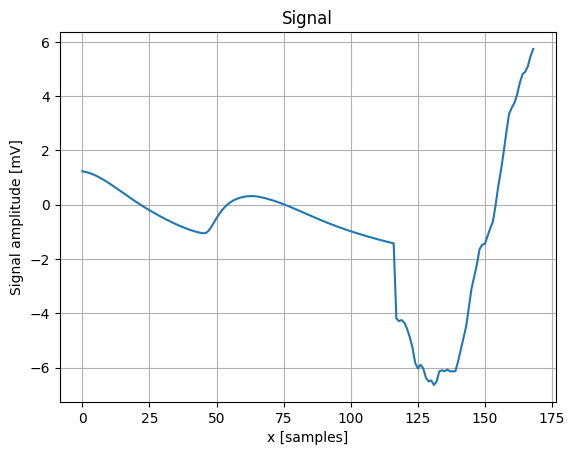

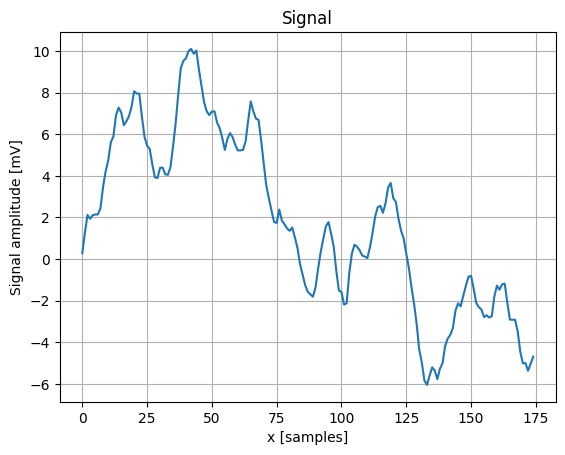

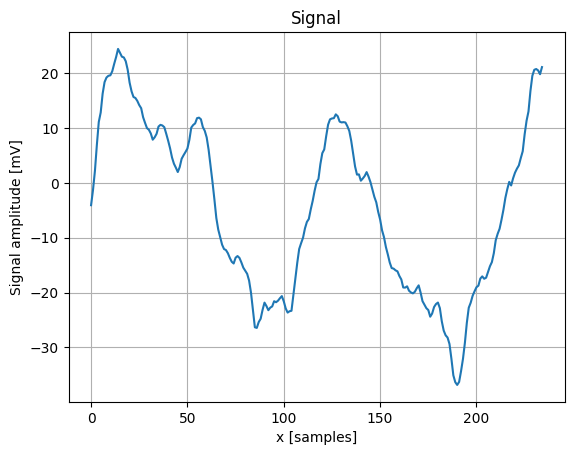

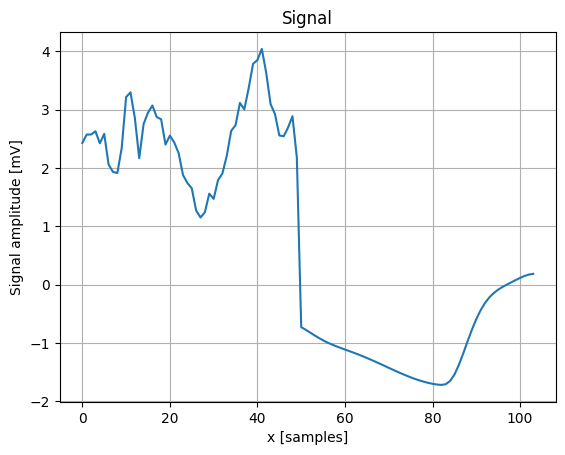

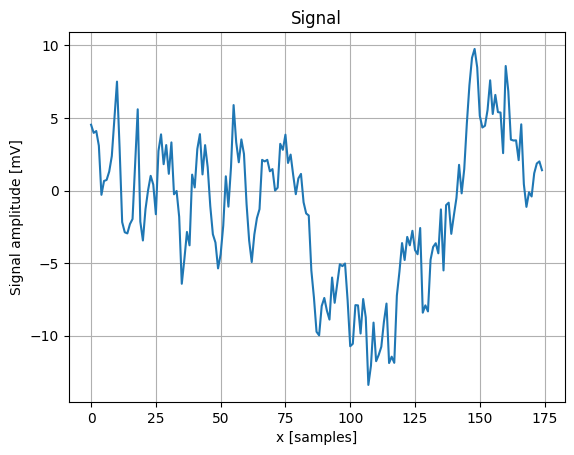

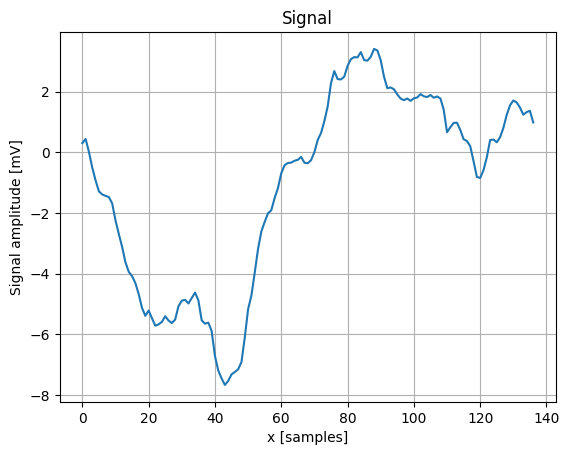

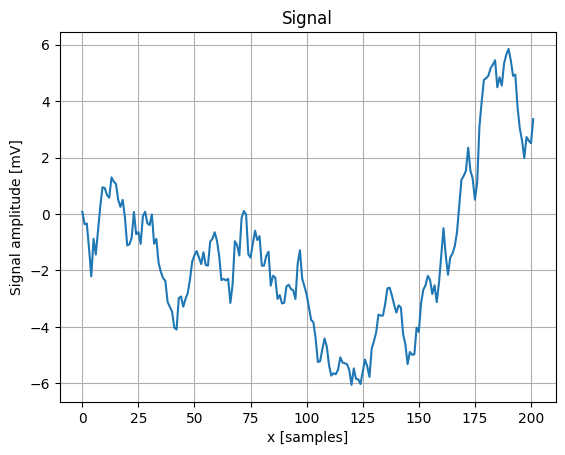

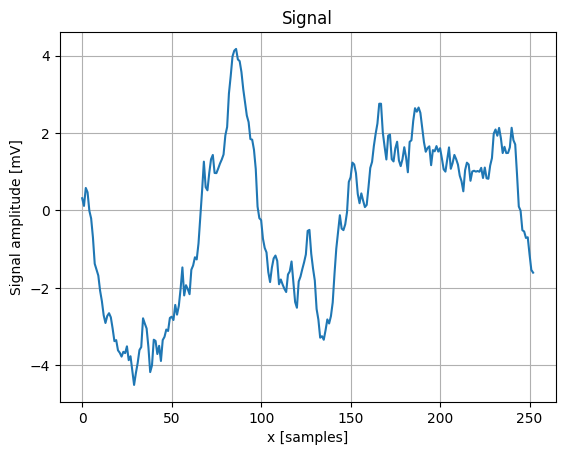

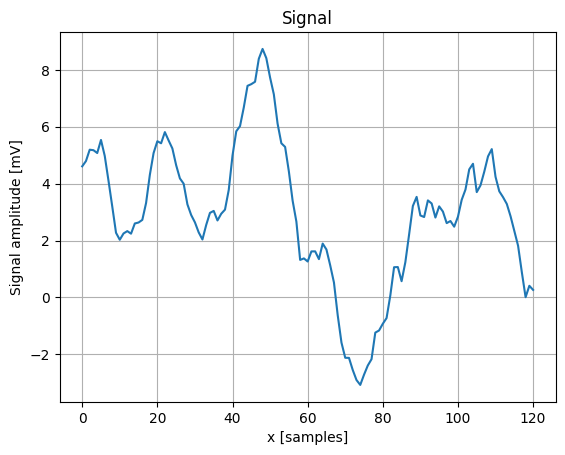

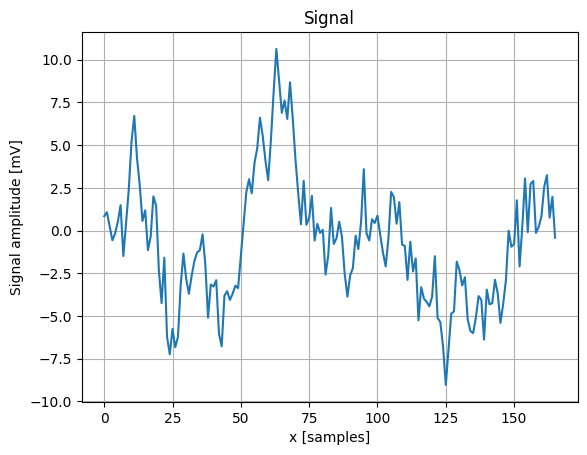

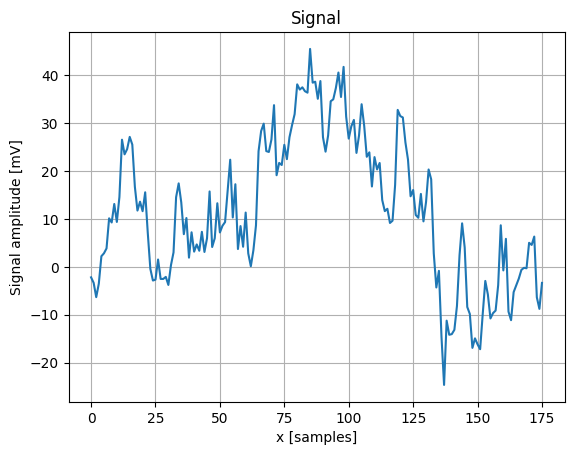

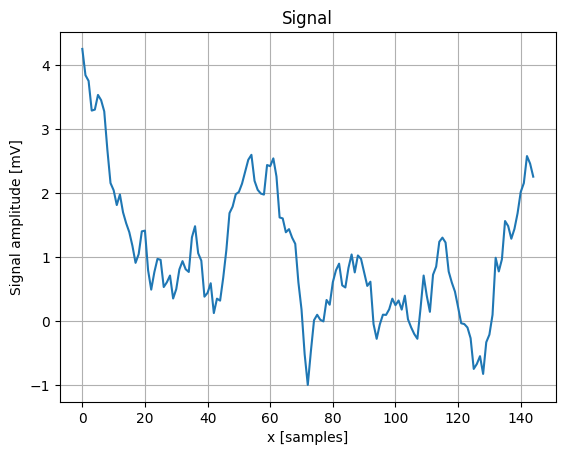

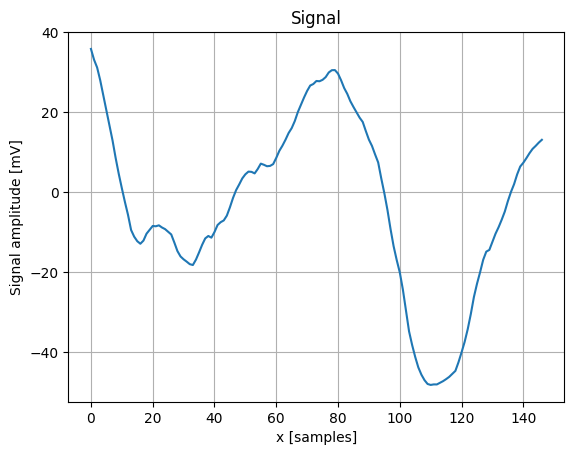

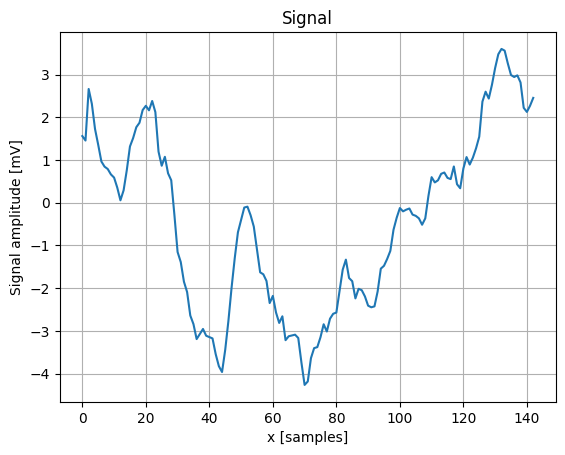

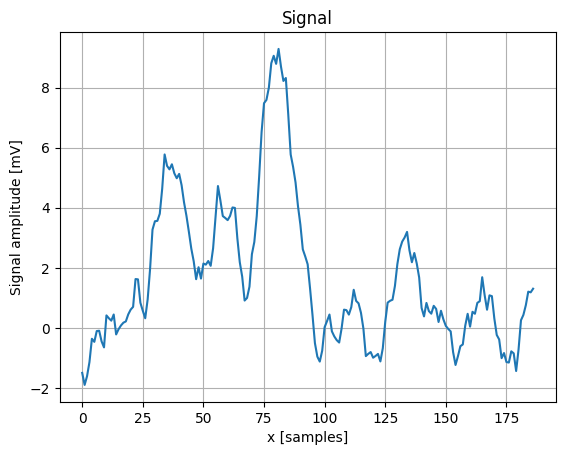

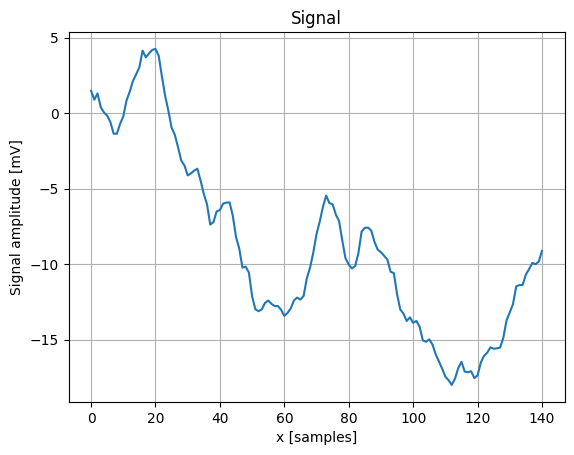

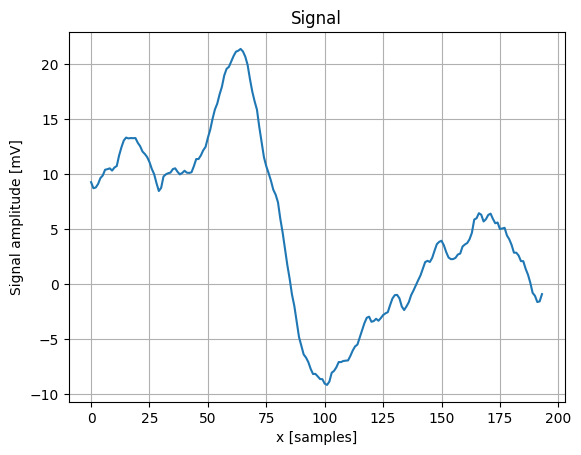

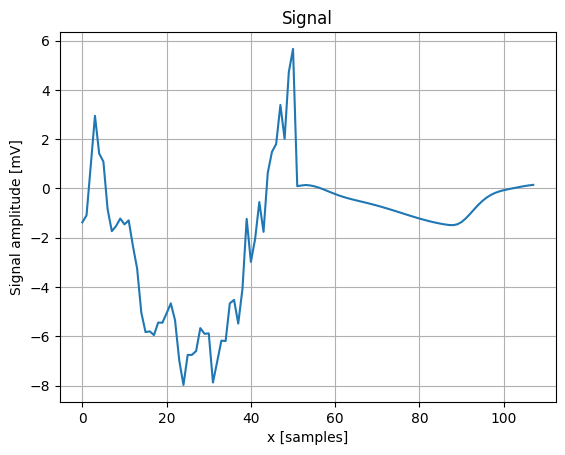

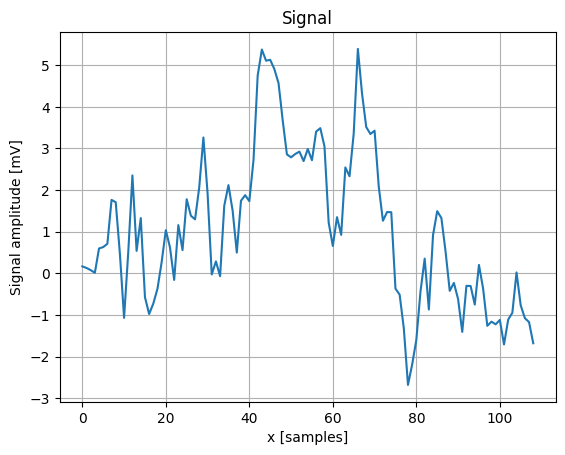

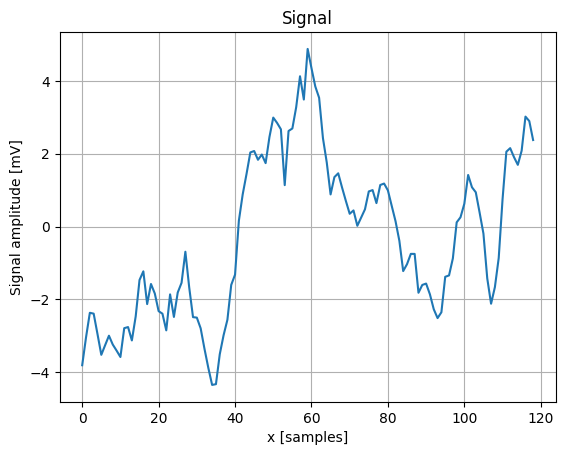

In [ ]:
S_after, S_out = remove_over_amplitude(S,massimo=4,minimo=-4)
size_eliminati += S_out.shape[0]
for indice in range(0,2000,100):
  plt.figure(indice/100)
  plt.plot(S_out[indice])
  plt.grid(True)
  plt.title('Signal')
  plt.xlabel('x [samples]')
  plt.ylabel('Signal amplitude [mV]')


<ipython-input-56-2fbc05d4cc9d>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  single_peaks_new=np.array(single_peaks_new)
<ipython-input-56-2fbc05d4cc9d>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return single_peaks_new , np.array(eliminati)


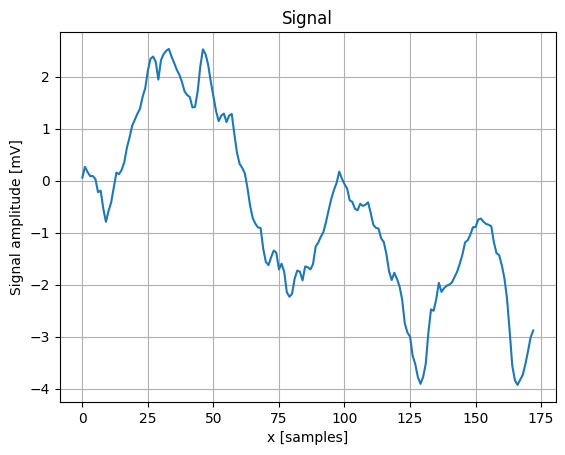

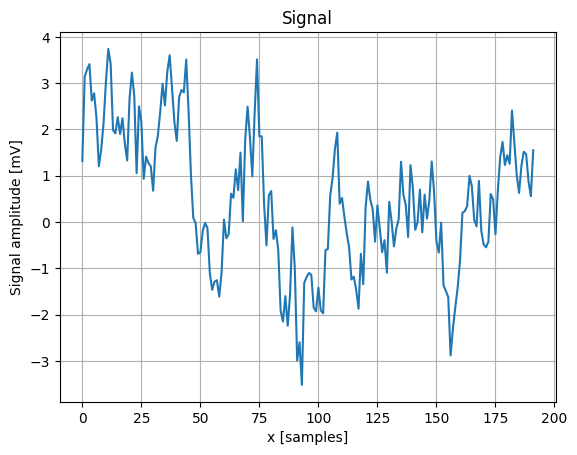

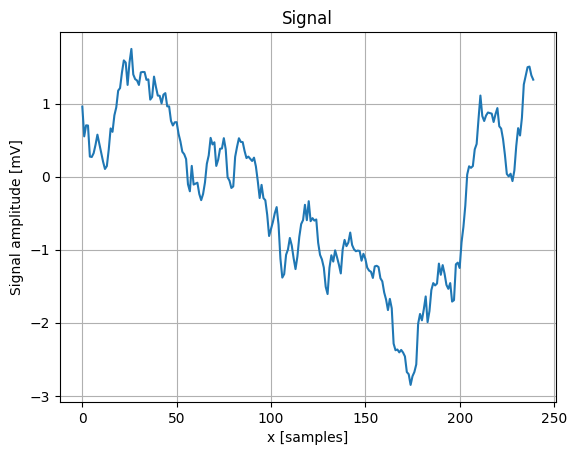

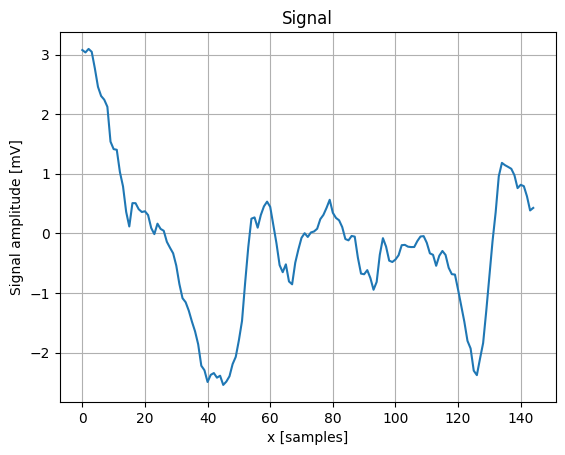

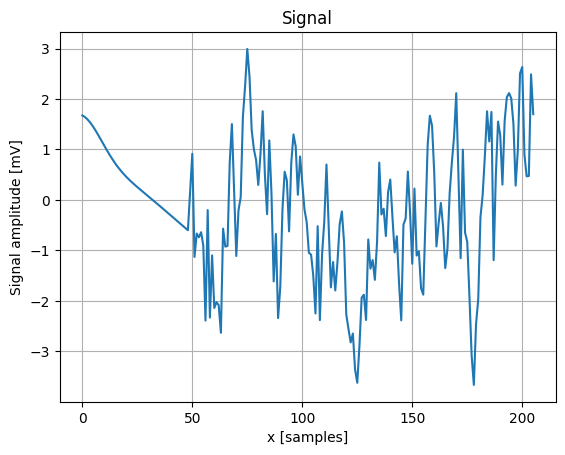

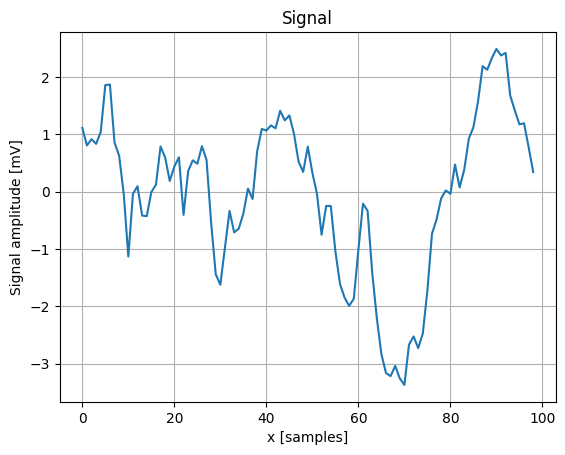

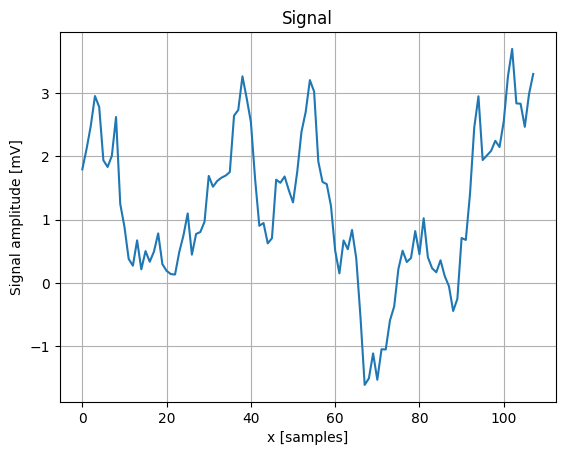

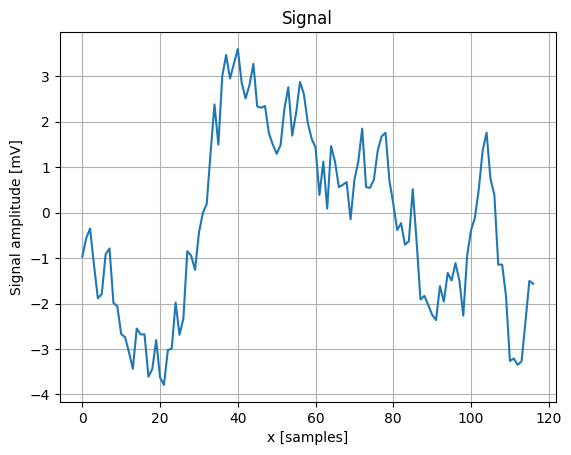

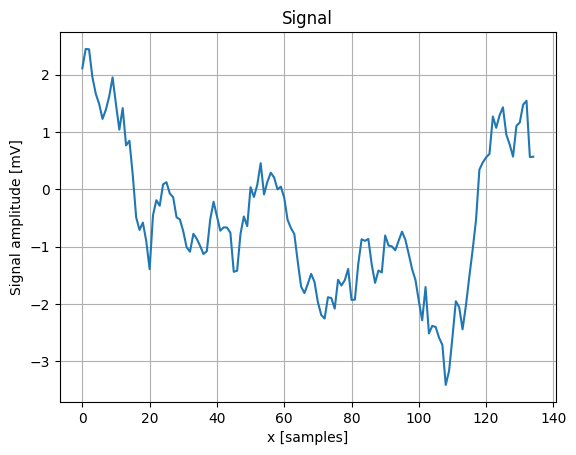

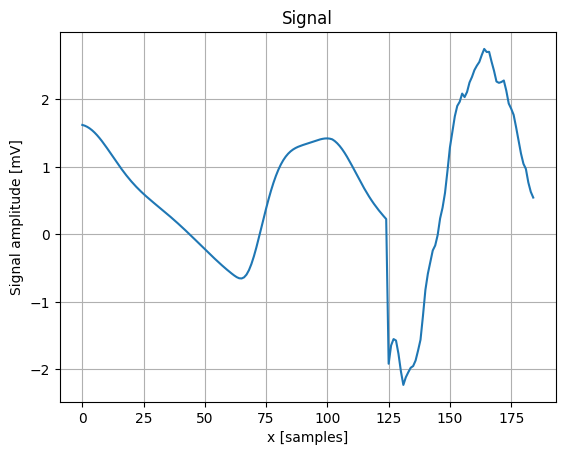

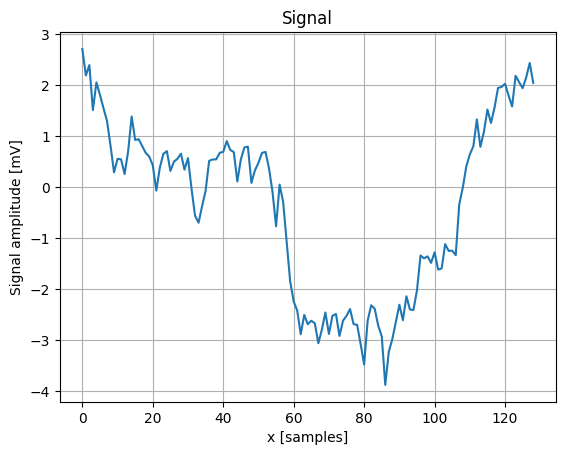

In [ ]:
S_after_after, S_out_out = remove_over_amplitude(S_after)
for indice in range(0,1100,100):
  plt.figure(indice/100)
  plt.plot(S_out_out[indice])
  plt.grid(True)
  plt.title('Signal')
  plt.xlabel('x [samples]')
  plt.ylabel('Signal amplitude [mV]')
size_filtrati+=S_out_out.shape[0]

<ipython-input-56-2fbc05d4cc9d>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  single_peaks_new=np.array(single_peaks_new)
<ipython-input-56-2fbc05d4cc9d>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return single_peaks_new , np.array(eliminati)


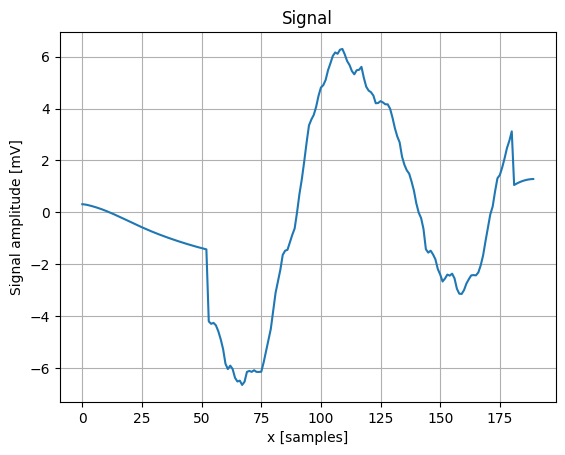

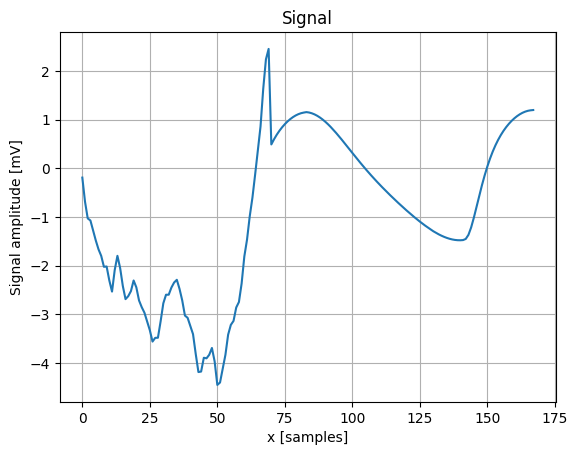

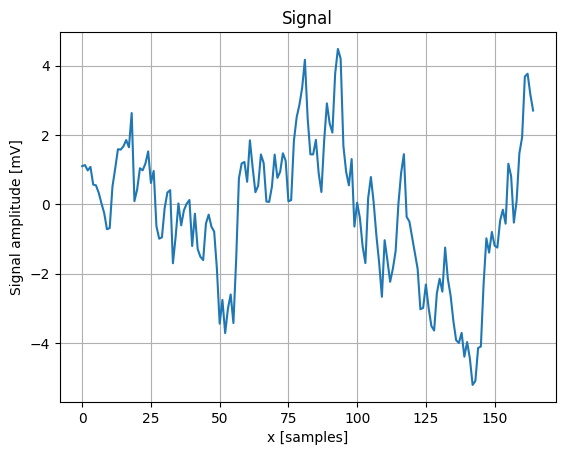

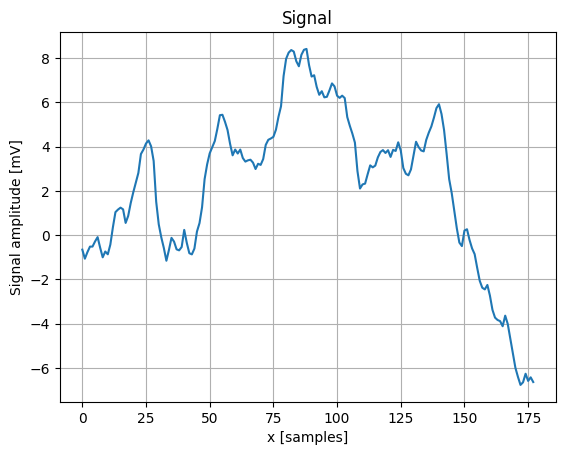

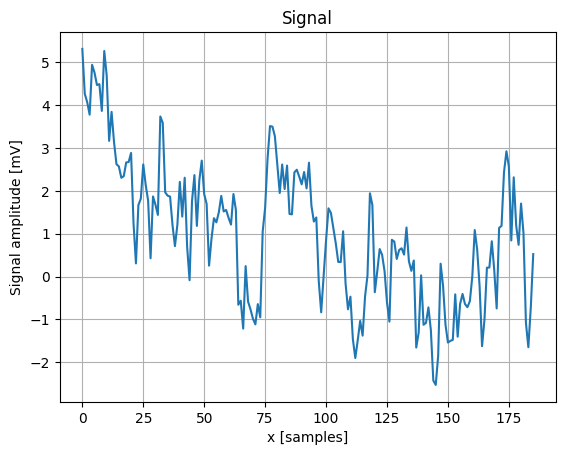

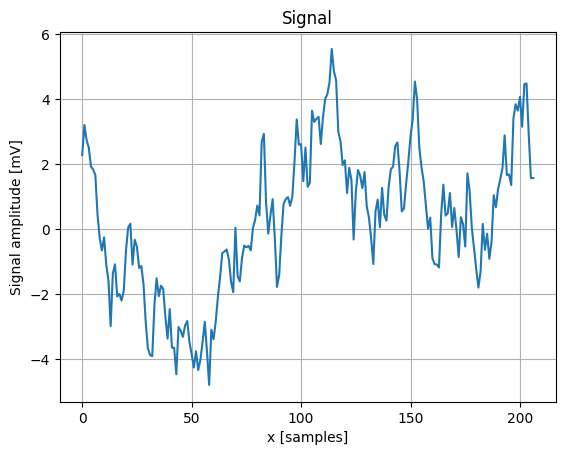

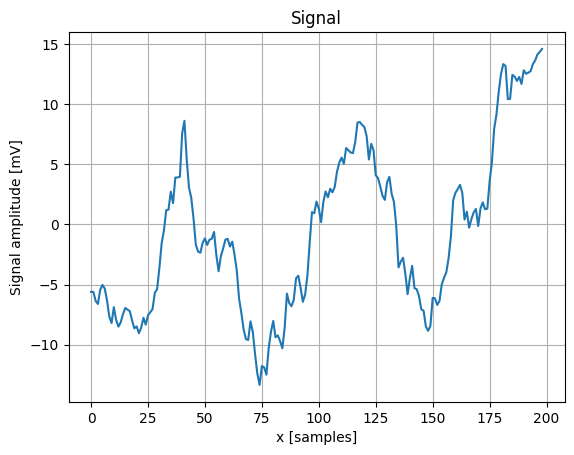

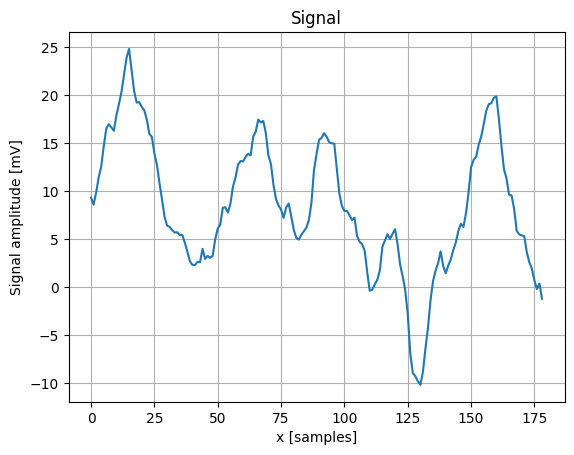

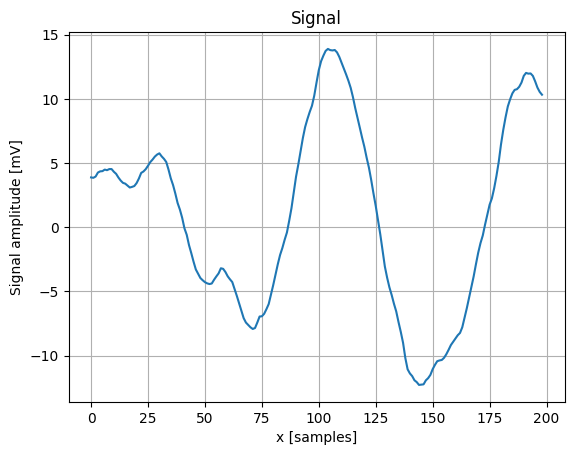

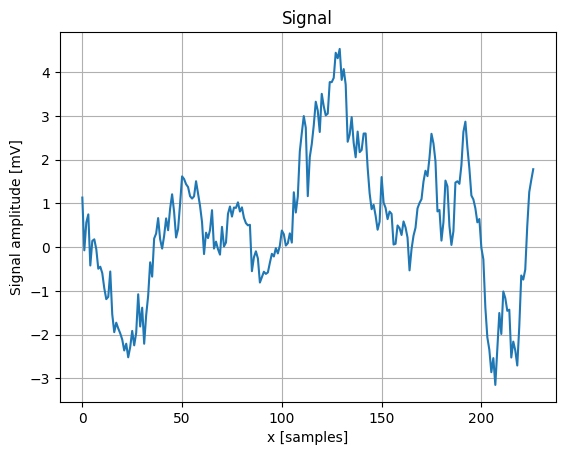

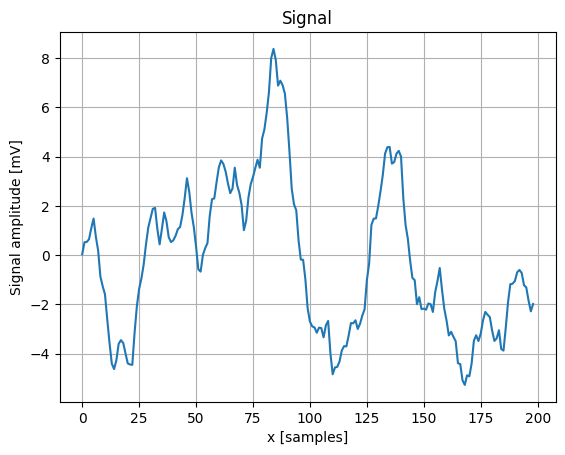

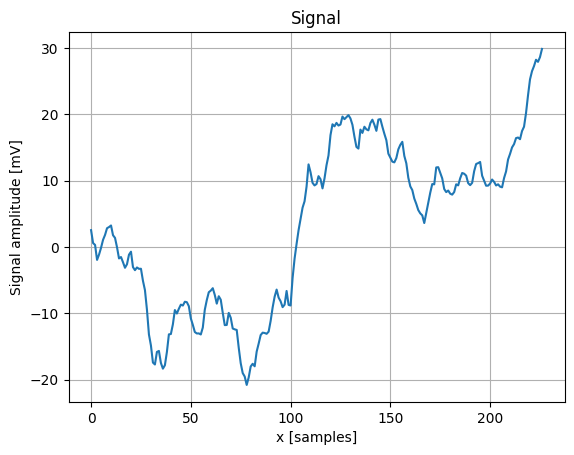

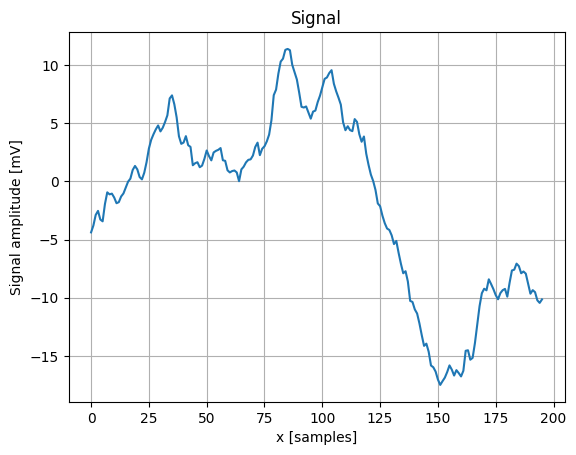

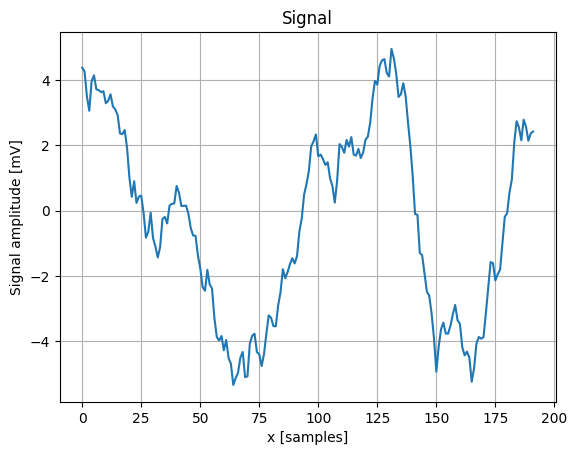

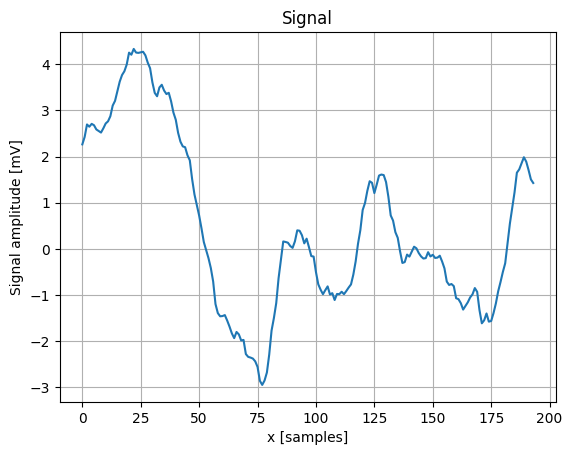

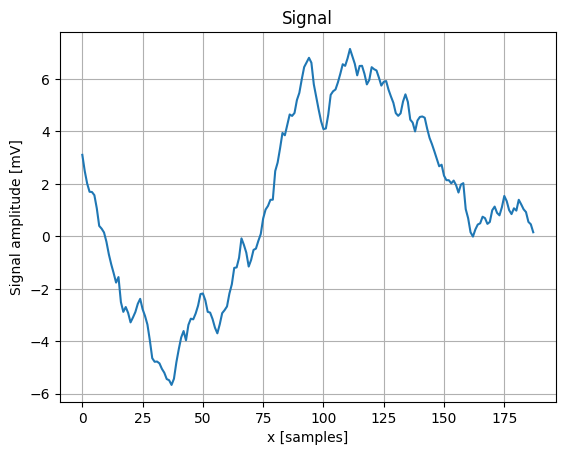

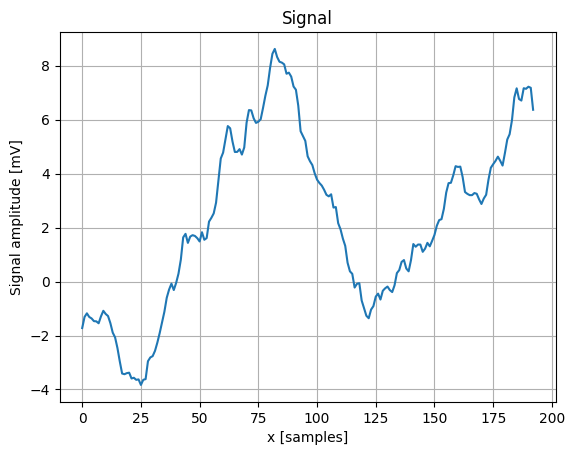

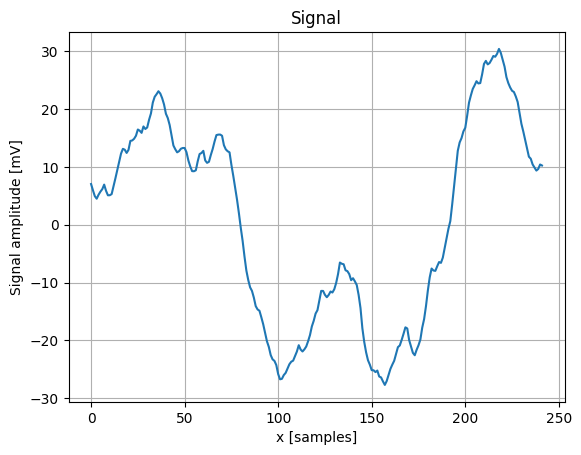

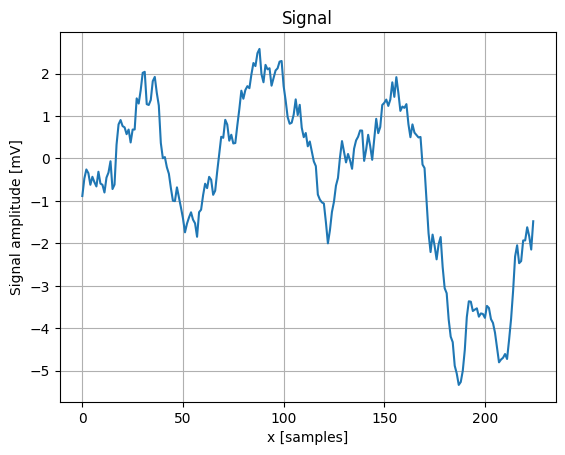

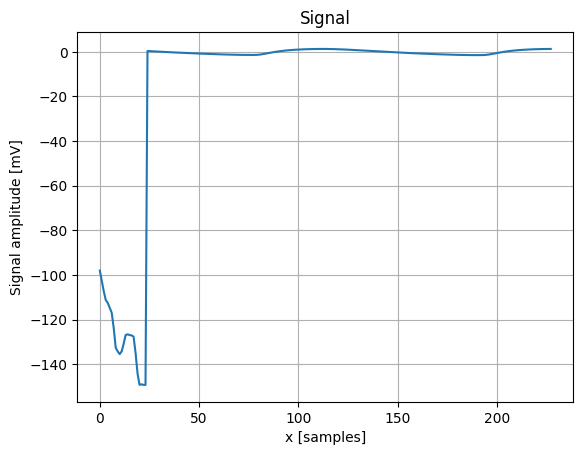

In [ ]:
N_after, N_out = remove_over_amplitude(N,massimo=4,minimo=-4)
size_eliminati += N_out.shape[0]
for indice in range(0,2000,100):
  plt.figure(indice/100)
  plt.plot(N_out[indice])
  plt.grid(True)
  plt.title('Signal')
  plt.xlabel('x [samples]')
  plt.ylabel('Signal amplitude [mV]')


<ipython-input-56-2fbc05d4cc9d>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  single_peaks_new=np.array(single_peaks_new)
<ipython-input-56-2fbc05d4cc9d>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return single_peaks_new , np.array(eliminati)


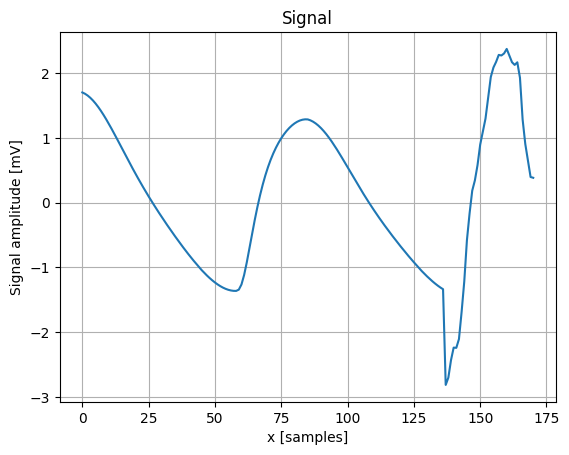

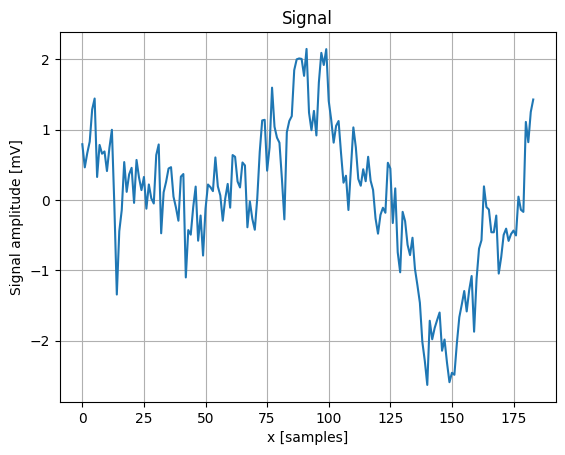

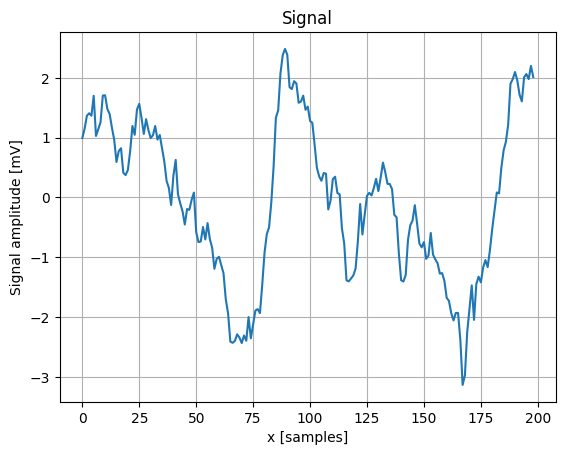

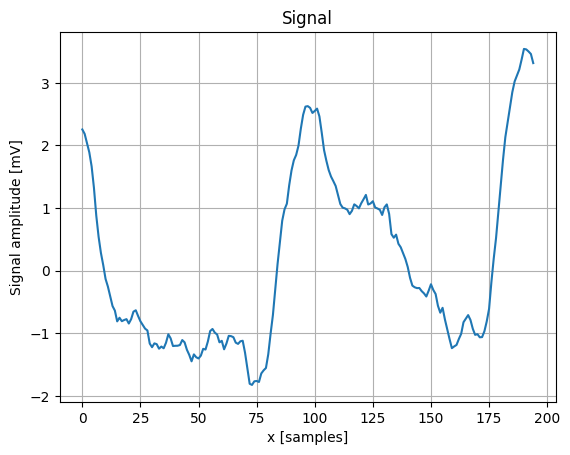

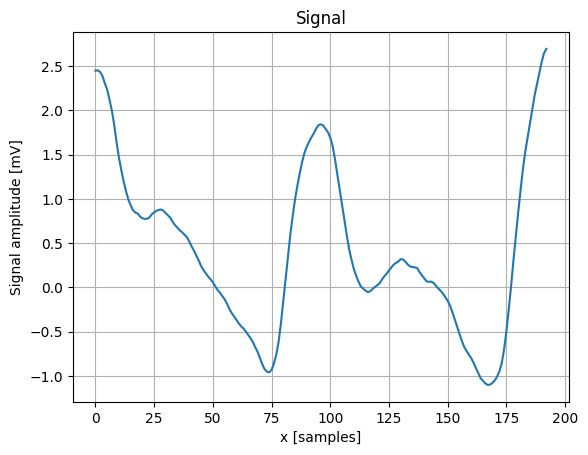

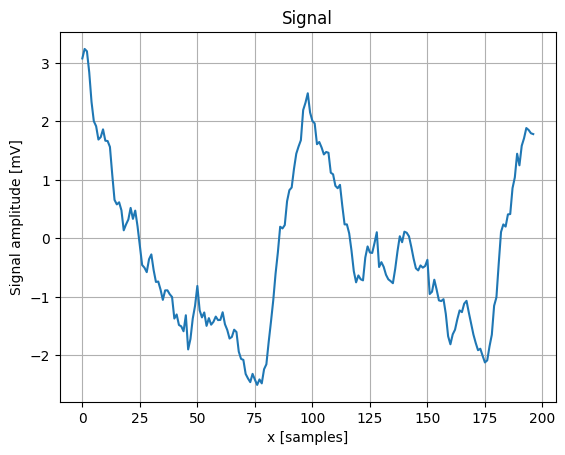

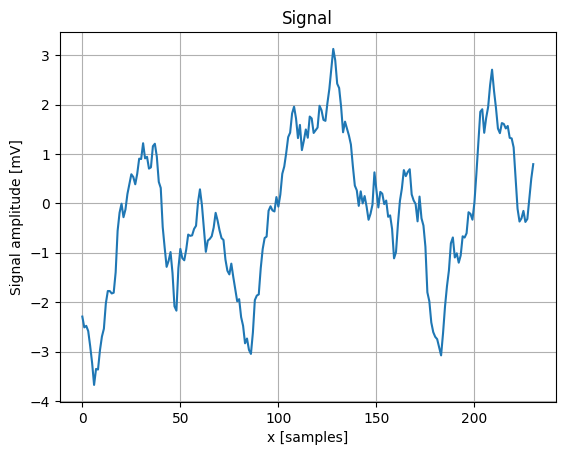

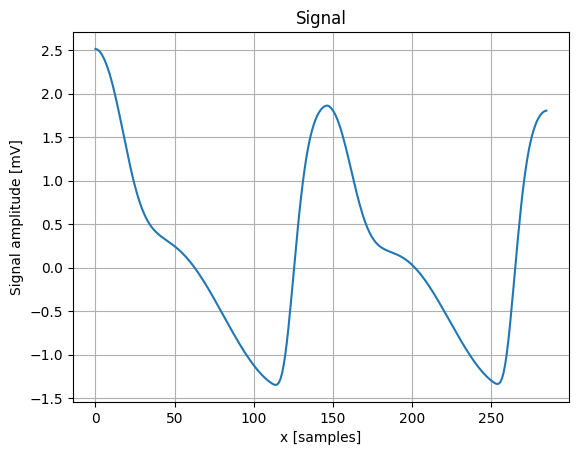

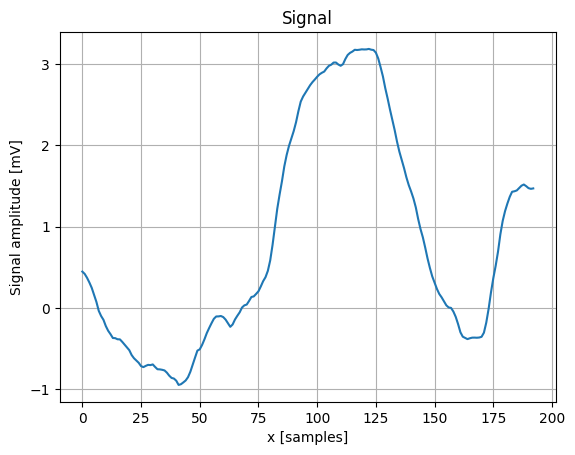

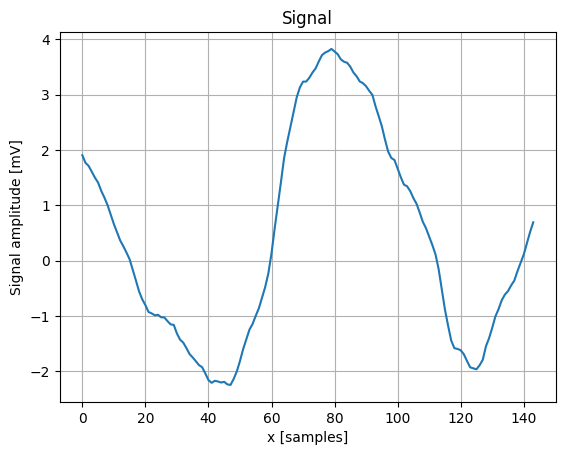

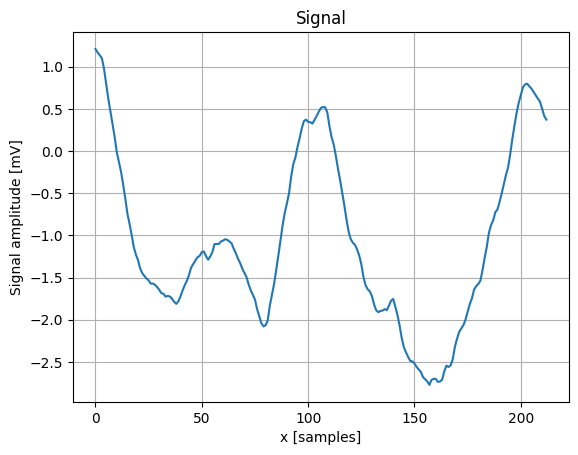

In [ ]:
N_after_after, N_out_out = remove_over_amplitude(N_after)
for indice in range(0,1100,100):
  plt.figure(indice/100)
  plt.plot(N_out_out[indice])
  plt.grid(True)
  plt.title('Signal')
  plt.xlabel('x [samples]')
  plt.ylabel('Signal amplitude [mV]')
size_filtrati+=N_out_out.shape[0]

<ipython-input-56-2fbc05d4cc9d>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  single_peaks_new=np.array(single_peaks_new)
<ipython-input-56-2fbc05d4cc9d>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return single_peaks_new , np.array(eliminati)


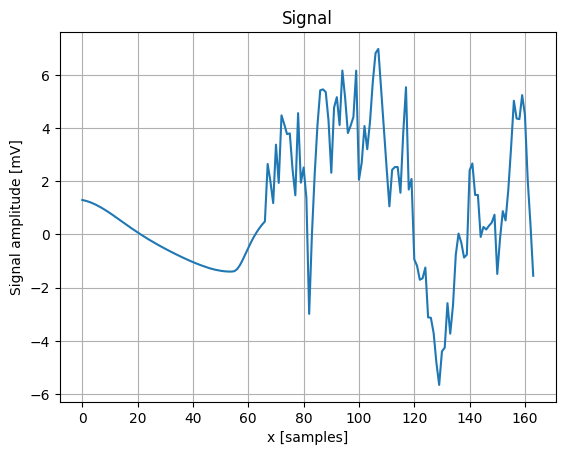

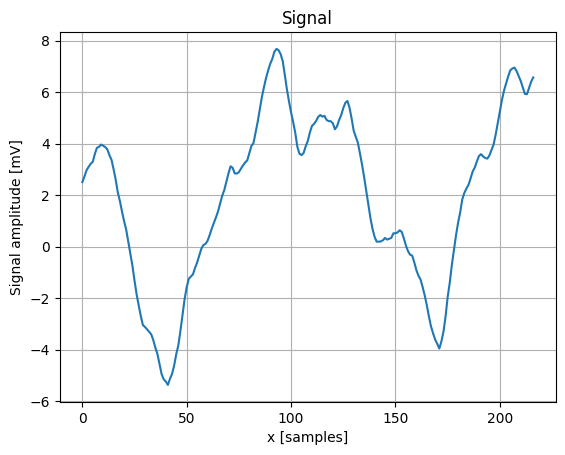

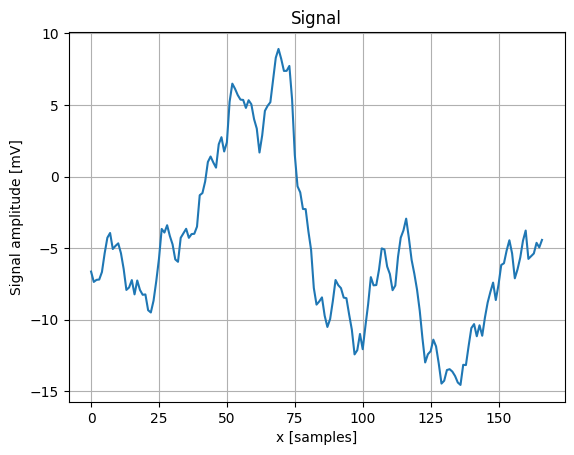

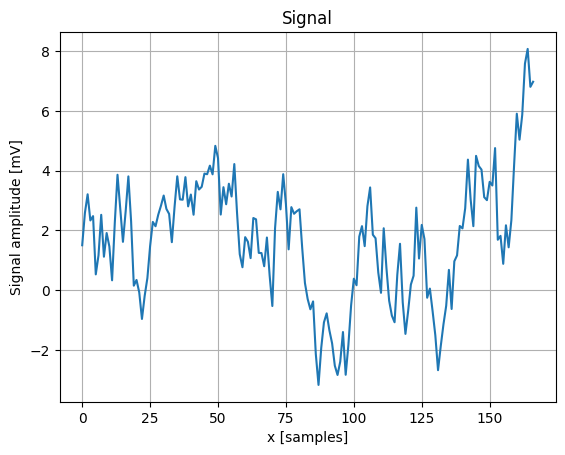

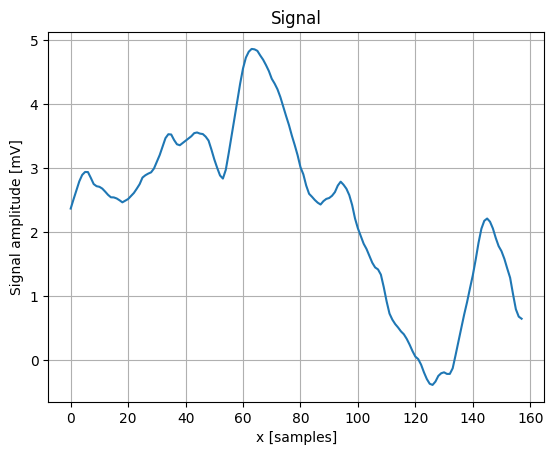

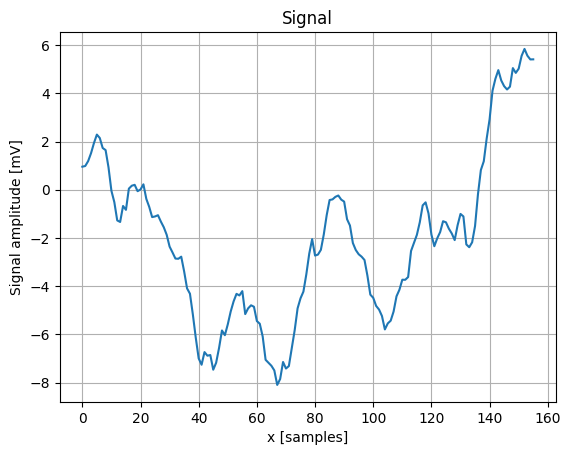

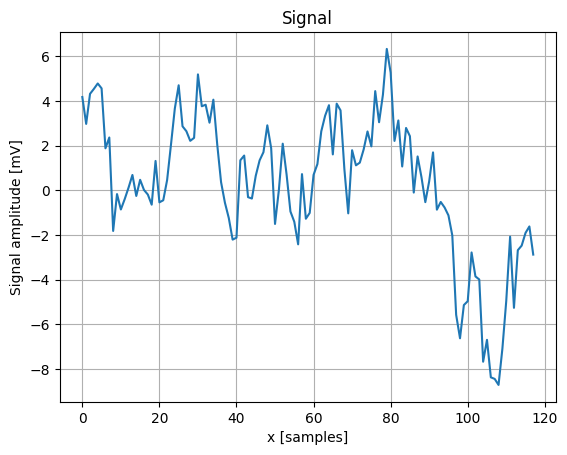

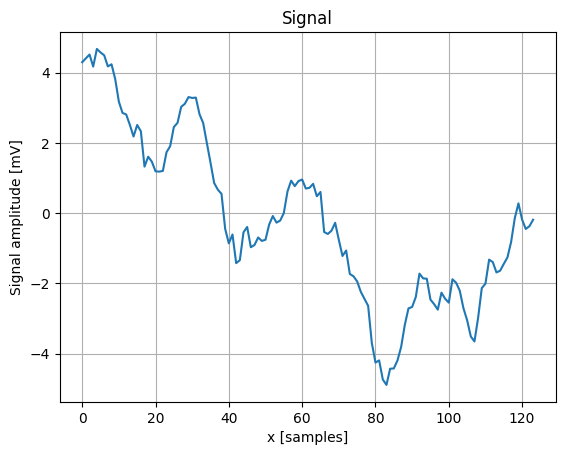

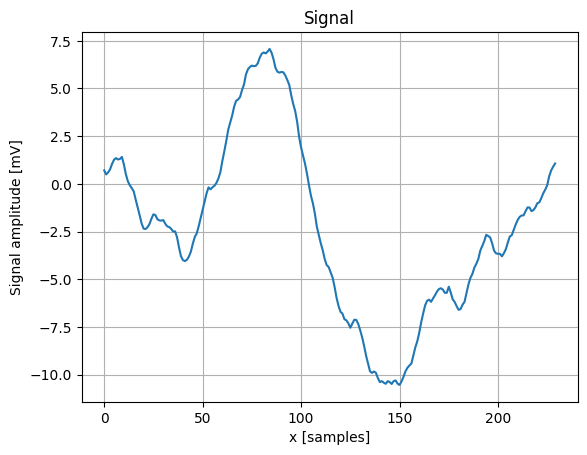

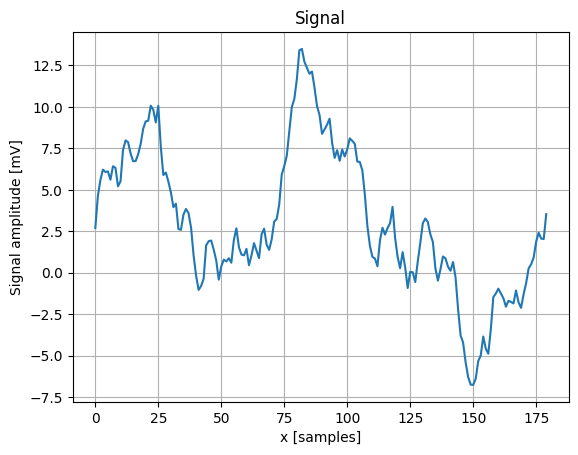

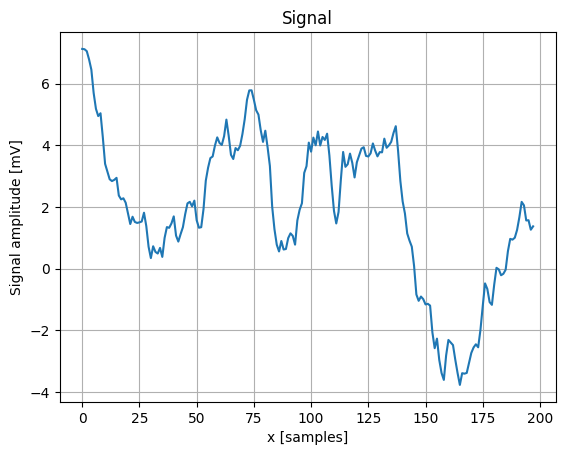

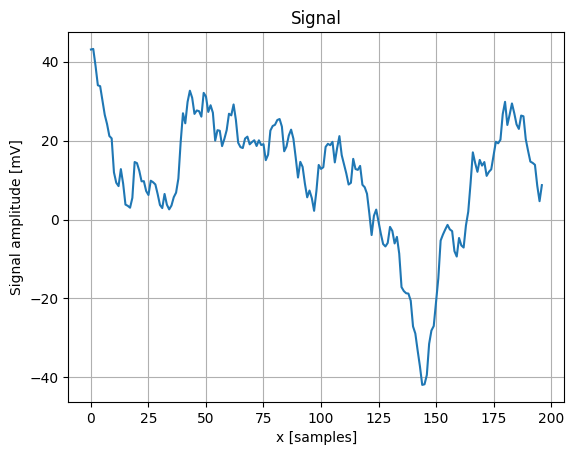

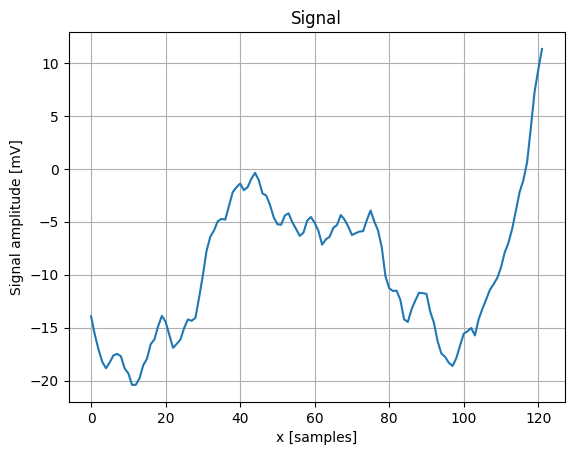

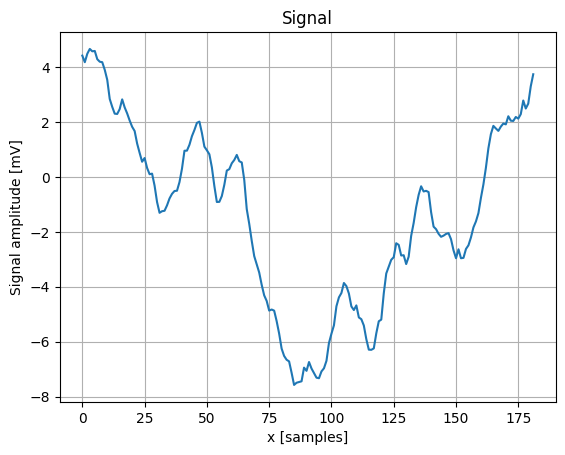

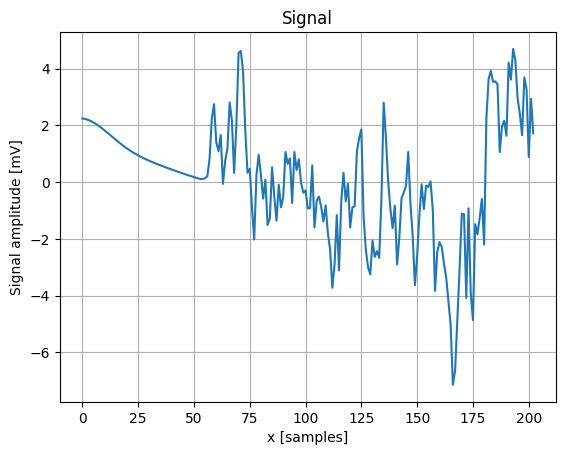

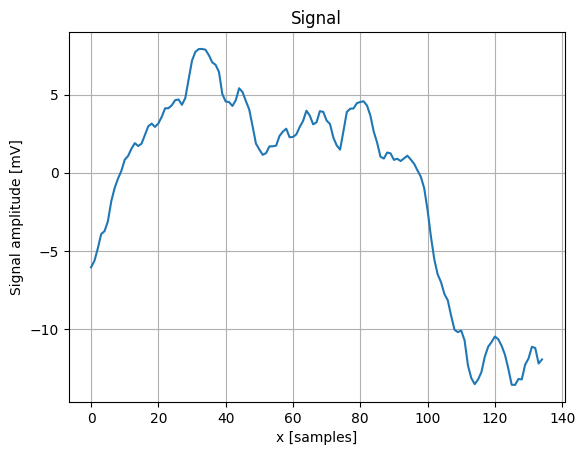

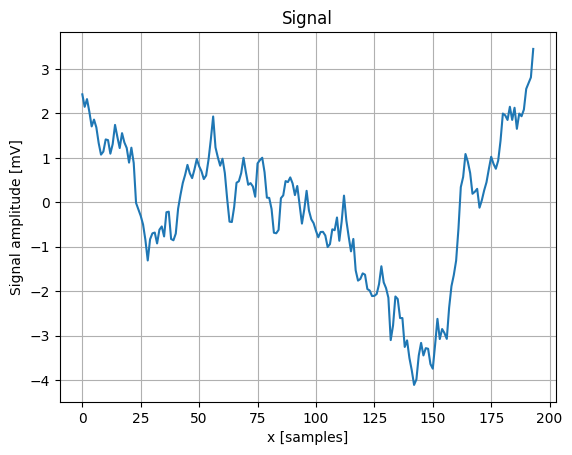

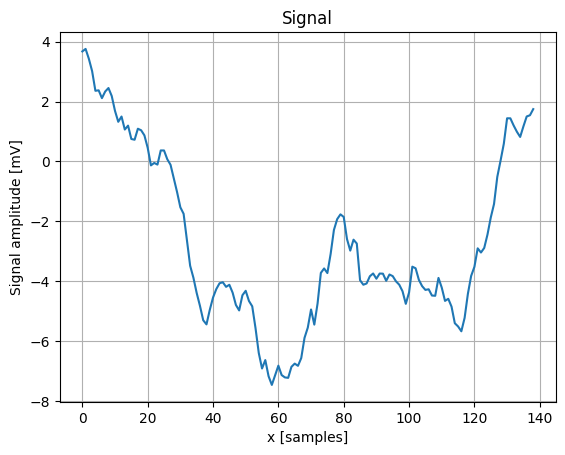

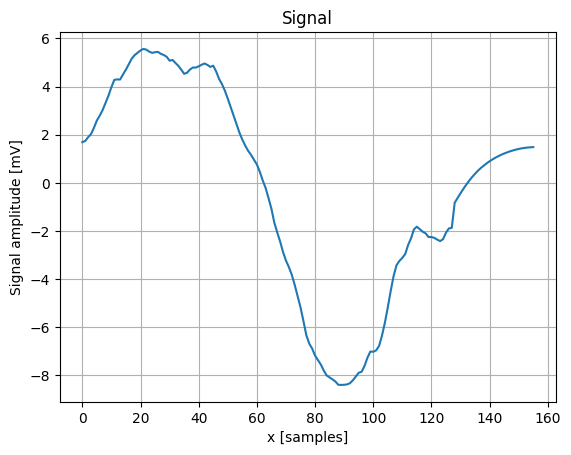

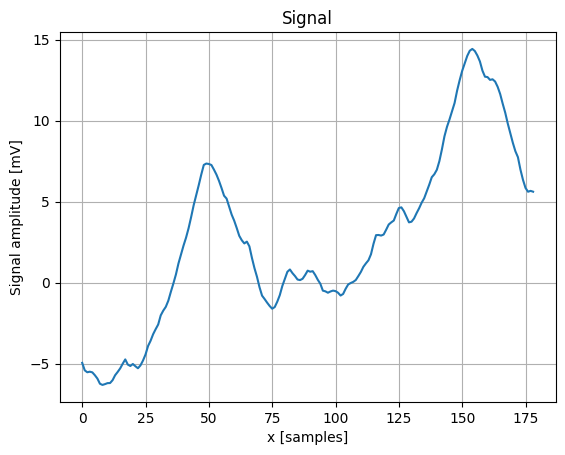

In [ ]:
V_after, V_out = remove_over_amplitude(V,massimo=4,minimo=-4)
size_eliminati += V_out.shape[0]
for indice in range(0,2000,100):
  plt.figure(indice/100)
  plt.plot(V_out[indice])
  plt.grid(True)
  plt.title('Signal')
  plt.xlabel('x [samples]')
  plt.ylabel('Signal amplitude [mV]')


<ipython-input-56-2fbc05d4cc9d>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  single_peaks_new=np.array(single_peaks_new)
<ipython-input-56-2fbc05d4cc9d>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return single_peaks_new , np.array(eliminati)


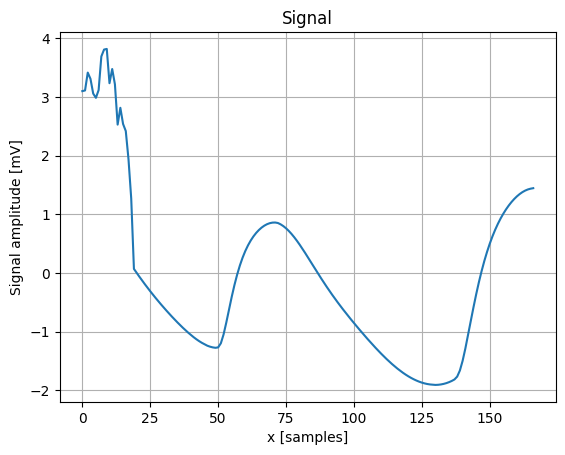

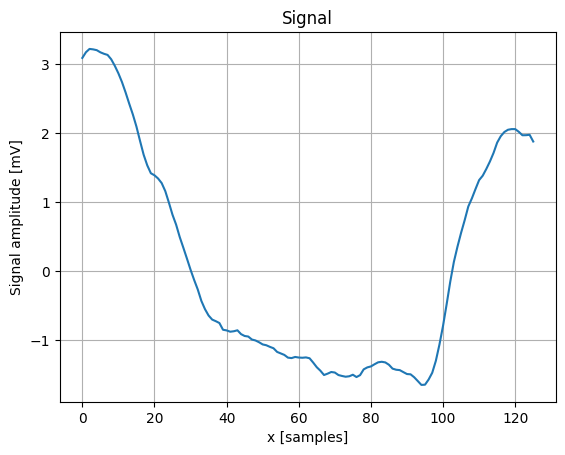

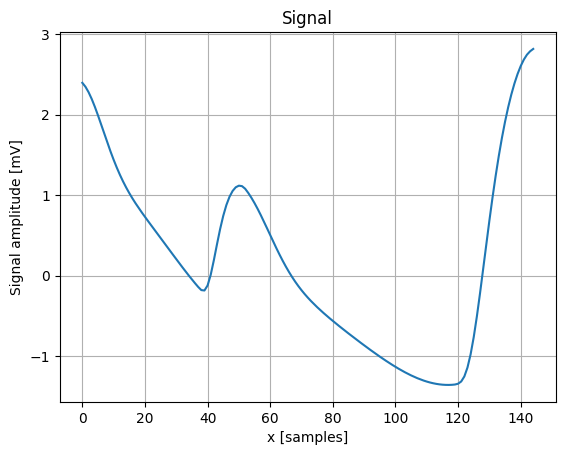

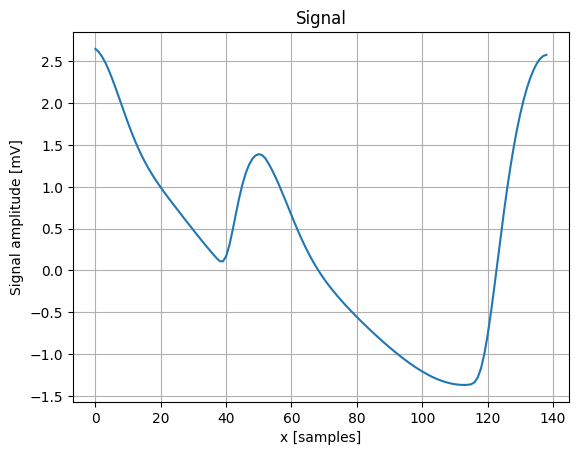

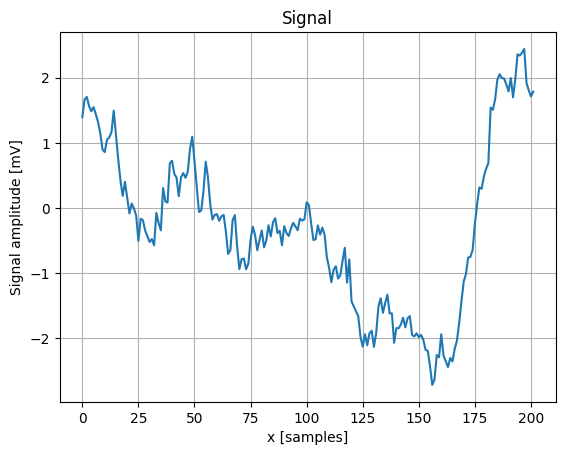

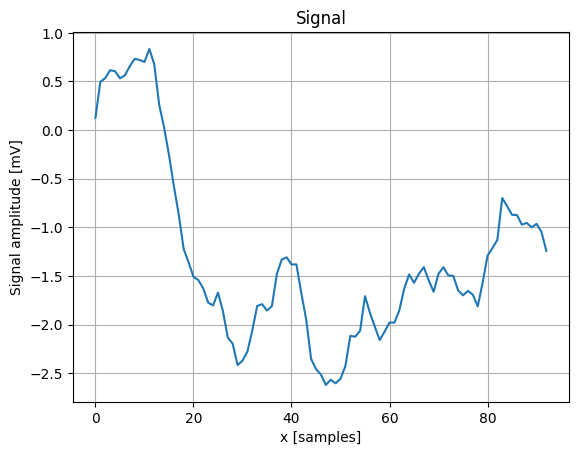

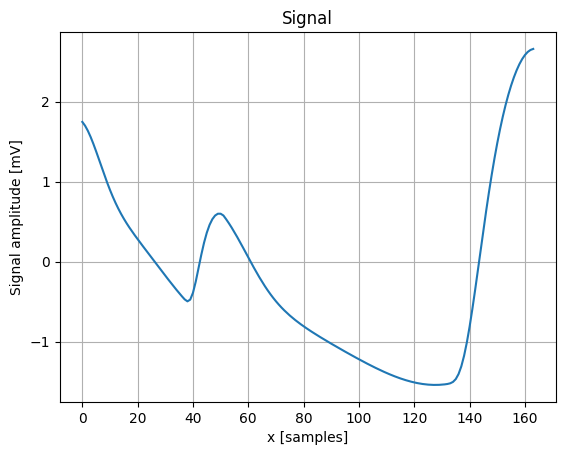

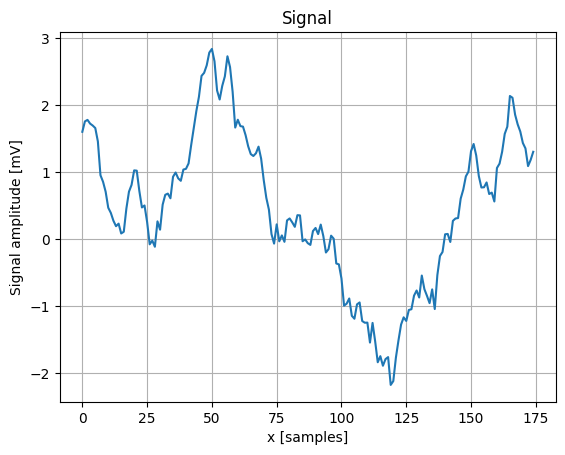

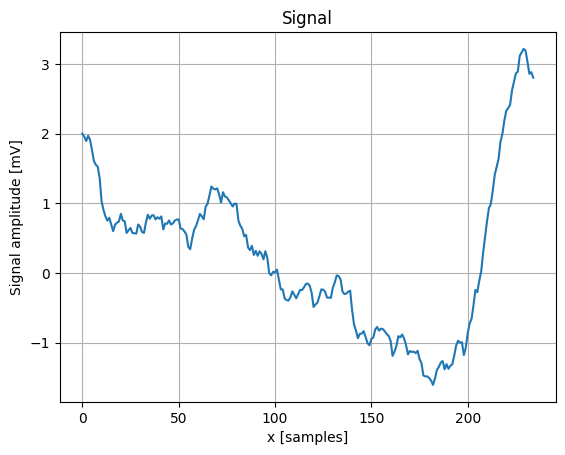

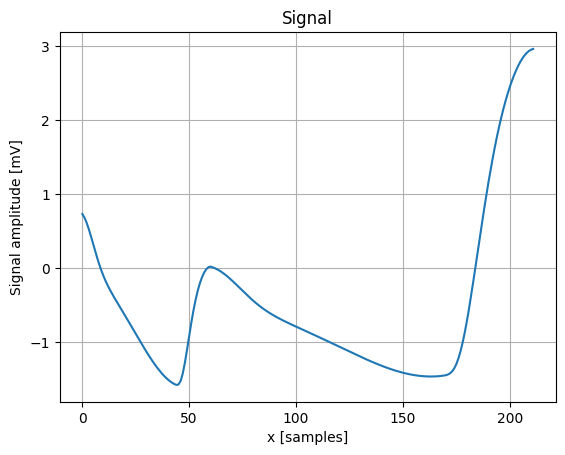

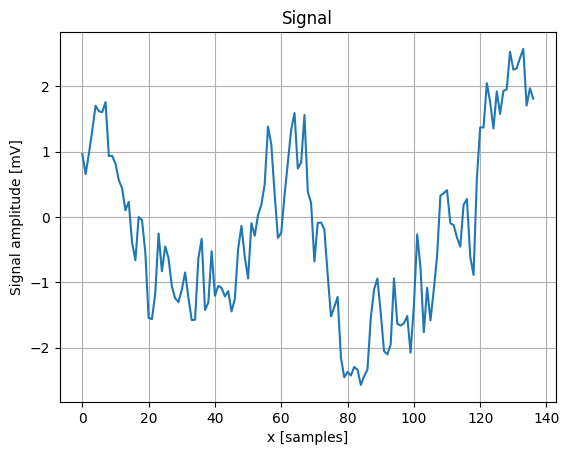

In [ ]:
V_after_after, V_out_out = remove_over_amplitude(V_after)
for indice in range(0,1100,100):
  plt.figure(indice/100)
  plt.plot(V_out_out[indice])
  plt.grid(True)
  plt.title('Signal')
  plt.xlabel('x [samples]')
  plt.ylabel('Signal amplitude [mV]')
size_filtrati+=V_out_out.shape[0]

In [ ]:
print('Totale campioni eliminati: ',size_eliminati)
print('Totale campioni filtrati: ',size_filtrati)

Totale campioni eliminati:  96350
Totale campioni filtrati:  27550


In [ ]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff_frequency, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff_frequency, sampling_rate, order=4):
    b, a = butter_lowpass(cutoff_frequency, sampling_rate, order=order)
    y = lfilter(b, a, data)
    return y

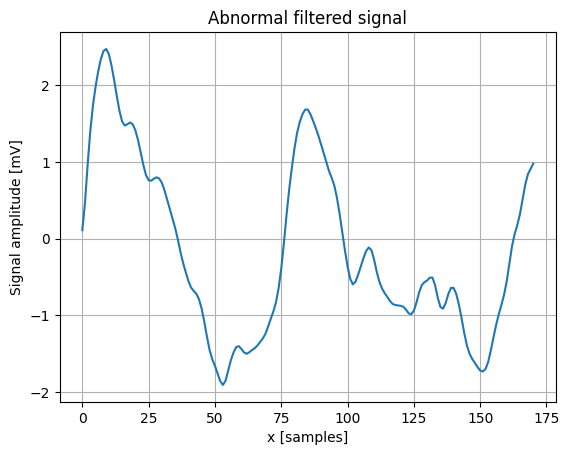

In [ ]:
plt.figure
S_filt = butter_lowpass_filter((V_out_out[330]), 10, 128, order=2)
plt.plot(S_filt)
plt.grid(True)
plt.title('Abnormal filtered signal')
plt.xlabel('x [samples]')
plt.ylabel('Signal amplitude [mV]')
plt.show()

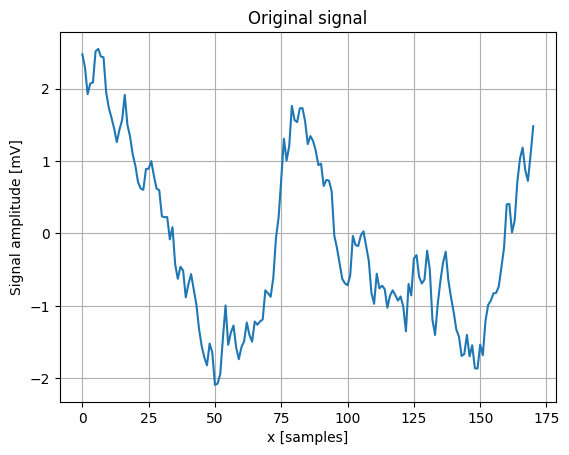

In [ ]:
plt.figure
plt.plot(V_out_out[330])
S_filt = butter_lowpass_filter(np.concatenate([np.ones(30)*V_out_out[330][0],V_out_out[330]],axis=0), 10, 128, order=2)
plt.grid(True)
plt.title('Original signal')
plt.xlabel('x [samples]')
plt.ylabel('Signal amplitude [mV]')
plt.show()

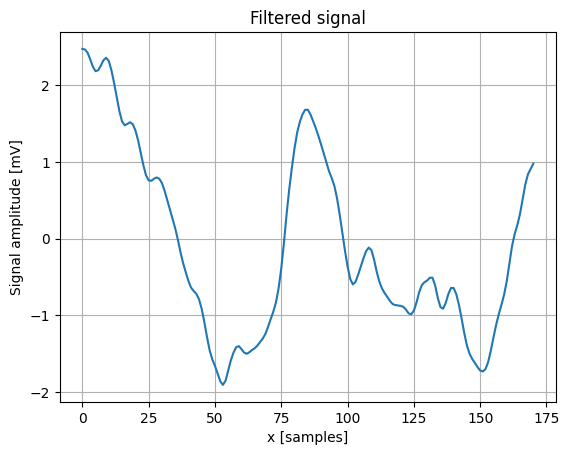

In [ ]:
plt.figure
plt.plot(S_filt[30:])
plt.grid(True)
plt.title('Filtered signal')
plt.xlabel('x [samples]')
plt.ylabel('Signal amplitude [mV]')
plt.show()

In [ ]:
S_filt = butter_lowpass_filter(np.concatenate([np.ones(30)*S_out_out[index][0],S_out_out[index]],axis=0), 10, 128, order=2)
plt.figure
plt.plot(S_filt[30:])
plt.show()

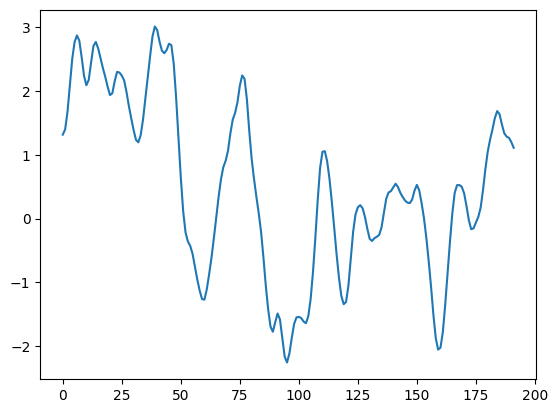

In [ ]:
plt.figure
plt.plot(S_filt[30:])
plt.show()

# WINDOW LENGHTS

In [ ]:
lunghezza=[]
for i in range(single_peaks.shape[0]):
  for j in range(single_peaks[i].shape[0]):
    if not single_peaks[i][j].shape[0]>1000:
      lunghezza.append(single_peaks[i][j].shape[0])
lunghezza=np.array(lunghezza)

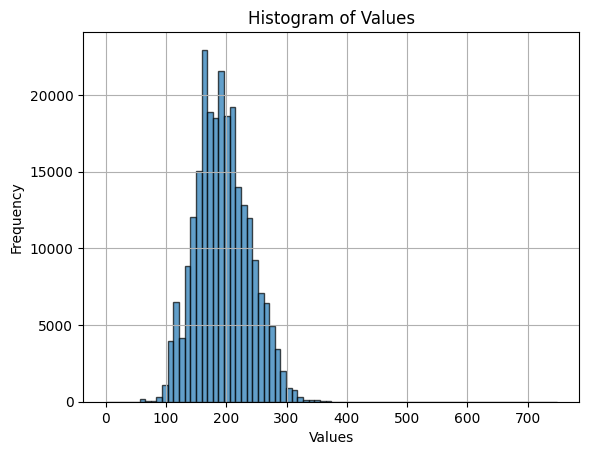

In [ ]:
# Plot the histogram
plt.hist(lunghezza, bins=80, edgecolor='black', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid(True)
plt.show()

In [ ]:
def hist_length(single_peaks):
  lunghezza=[]
  for i in range(single_peaks.shape[0]):
      if not single_peaks[i].shape[0]>300:
        lunghezza.append(single_peaks[i].shape[0])
  lunghezza=np.array(lunghezza)
  # Plot the histogram
  plt.hist(lunghezza, bins=80, edgecolor='black', alpha=0.7)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.title('Histogram of Values')
  plt.grid(True)
  plt.show()

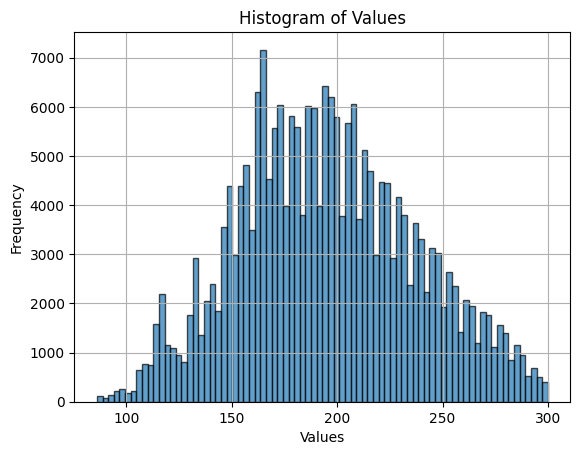

In [ ]:
hist_length(single_peaks_N)

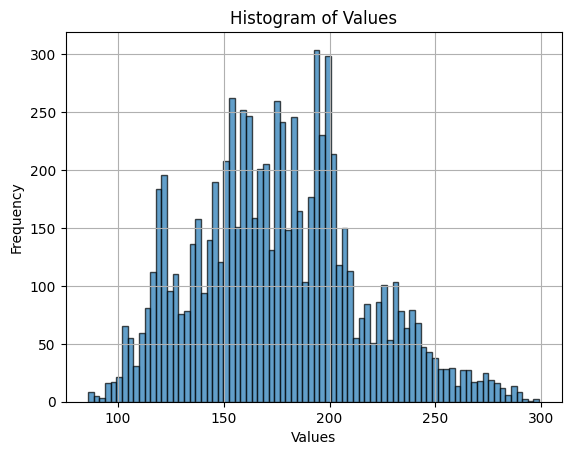

In [ ]:
hist_length(single_peaks_V)

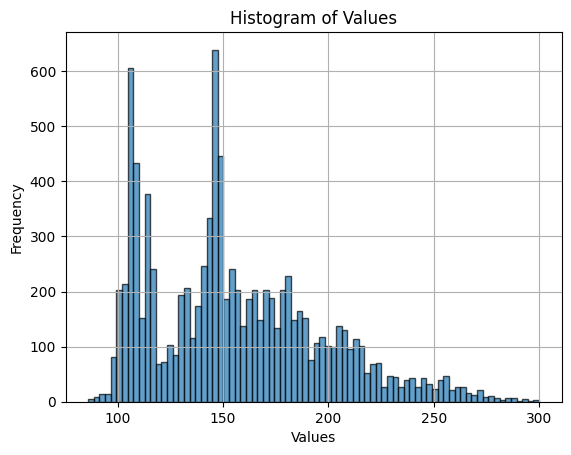

In [ ]:
hist_length(single_peaks_S)

## WINDOW FILTERING + SEPARETE CLASSES +  SAVING



In [ ]:
#remove peaks which have length over a certain interval
def remove_over_length(single_peaks_S,central_peaks_S,bpm_min=40,bpm_max=180):
  numero_cicli=2
  fs=128
  lunghezza_min=60*numero_cicli*fs/bpm_max
  lunghezza_max=60*numero_cicli*fs/bpm_min
  single_peaks_new=[]
  central_peaks_new=[]
  for i in range(single_peaks_S.shape[0]):
    finestra_singola=single_peaks_S[i]
    if lunghezza_min<finestra_singola.shape[0] and finestra_singola.shape[0]<lunghezza_max:
      single_peaks_new.append(finestra_singola)
      central_peaks_new.append(central_peaks_S[i])
  single_peaks_new=np.array(single_peaks_new)
  return single_peaks_new,np.array(central_peaks_new), single_peaks_S.shape[0]-single_peaks_new.shape[0]

In [ ]:
#remove peaks that have amplitude out of a predefined range
def remove_over_amplitude(single_peaks_S,central_peaks_S,massimo=4,minimo=-4):
  single_peaks_new=[]
  central_peaks_new=[]
  eliminati=[]
  eliminati_peaks = []
  for i in range(single_peaks_S.shape[0]):
    finestra_singola=single_peaks_S[i]
    if minimo<np.min(finestra_singola) and np.max(finestra_singola)<massimo:
      single_peaks_new.append(finestra_singola)
      central_peaks_new.append(central_peaks_S[i])
    else:
      eliminati.append(finestra_singola)
      eliminati_peaks.append(central_peaks_S[i])
  single_peaks_new=np.array(single_peaks_new)
  return single_peaks_new, np.array(central_peaks_new),single_peaks_S.shape[0]-single_peaks_new.shape[0],np.array(eliminati),np.array(eliminati_peaks)

In [ ]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff_frequency, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff_frequency, sampling_rate, order=4):
    b, a = butter_lowpass(cutoff_frequency, sampling_rate, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
def extract_final_set(single_peaks, single_labels, central_peak, dataset = 'training'):

  ##### split single peaks based on the different classes #####
  single_peaks_N=[]
  single_peaks_S=[]
  single_peaks_V=[]

  central_peak_N=[]
  central_peak_S=[]
  central_peak_V=[]

  for i in range(single_peaks.shape[0]): # for the different patients
    for j in range(single_peaks[i].shape[0]): # for the different single peak
      if single_labels[i][j]=='N':
        single_peaks_N.append(single_peaks[i][j])
        central_peak_N.append(central_peak[i][j])
      elif single_labels[i][j]=='S':
        single_peaks_S.append(single_peaks[i][j])
        central_peak_S.append(central_peak[i][j])
      else:
        single_peaks_V.append(single_peaks[i][j])
        central_peak_V.append(central_peak[i][j])

  single_peaks_N=np.array(single_peaks_N)
  single_peaks_S=np.array(single_peaks_S)
  single_peaks_V=np.array(single_peaks_V)

  central_peak_N=np.array(central_peak_N)
  central_peak_S=np.array(central_peak_S)
  central_peak_V=np.array(central_peak_V)

  ##### filter the signal based on lenght or amplitude #####
  peaks = [single_peaks_N, single_peaks_S, single_peaks_V]
  central = [central_peak_N, central_peak_S, central_peak_V]
  clas = ['N', 'S', 'V']

  for ii in range(len(peaks)):
    temp_single_peak, temp_central_peak , eliminati_length = remove_over_length(peaks[ii], central[ii])
    final_single_peak , final_central_peaks ,eliminati_amplitude, eliminati,eliminati_peaks = remove_over_amplitude(temp_single_peak, temp_central_peak,massimo=4,minimo=-4)
    final_single_peak , final_central_peaks ,eliminati_amplitude, eliminati,eliminati_peaks = remove_over_amplitude(final_single_peak, final_central_peaks ,massimo=2.5,minimo=-2.5)

    final_peak_filt = []
    for iii in range(eliminati.shape[0]):
      temp = butter_lowpass_filter(np.concatenate([np.ones(30)*eliminati[iii][0],eliminati[iii]],axis=0), 10, 128, order=2)
      final_peak_filt.append(temp[30:]) #shift back
    final_peak_filt = np.array(final_peak_filt)

    final_single_peak = np.concatenate([final_single_peak,final_peak_filt],axis=0)
    final_central_peaks = np.concatenate([final_central_peaks,eliminati_peaks],axis=0)

    np.save('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/' + dataset + '_single_peaks_1' + clas[ii] + '.npy', final_single_peak)
    np.save('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/' + dataset + '_centra_peaks_1' + clas[ii] + '.npy', final_central_peaks )

In [ ]:
extract_final_set(single_peaks_training, single_labels_training, central_peak_training, dataset = 'training')
extract_final_set(single_peaks_validation, single_labels_validation, central_peak_validation, dataset = 'validation')
extract_final_set(single_peaks_test, single_labels_test, central_peak_test, dataset = 'test')

# LOOK WINDOW

In [ ]:
train_central_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_centra_peaks_N.npy')
train_central_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_centra_peaks_S.npy')
train_central_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_centra_peaks_V.npy')
train_single_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_single_peaks_V.npy',allow_pickle=True)
train_single_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_single_peaks_N.npy',allow_pickle=True)
train_single_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_single_peaks_S.npy',allow_pickle=True)


val_central_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_centra_peaks_N.npy')
val_central_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_centra_peaks_S.npy')
val_central_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_centra_peaks_V.npy')
val_single_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_single_peaks_V.npy',allow_pickle=True)
val_single_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_single_peaks_N.npy',allow_pickle=True)
val_single_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_single_peaks_S.npy',allow_pickle=True)


test_central_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_centra_peaks_N.npy')
test_central_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_centra_peaks_S.npy')
test_central_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_centra_peaks_V.npy')
test_single_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_single_peaks_V.npy',allow_pickle=True)
test_single_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_single_peaks_N.npy',allow_pickle=True)
test_single_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_single_peaks_S.npy',allow_pickle=True)

In [ ]:
t = 0
for i in range(train_single_peaks_V.shape[0]):
  plt.plot(train_single_peaks_V[i])
  #plt.plot(train_single_peaks_S[i])

  plt.show()

In [ ]:
t = 0
for i in range(train_single_peaks_V.shape[0]):
  plt.plot(train_single_peaks_S[i])

  plt.show()